### Filtrando apenas links bons pro stacking com base em 0.2, 0.3, 0.4 e 0.5 taxas de missing

In [9]:
import json
import os
import shutil

# Caminho do arquivo JSON
json_path = "../../results/metrics_summary_final.json"

# Caminho da pasta com os datasets imputados originais
input_dir = r"../../datasets/multivariada-imputed-final"

# Caminho da nova pasta onde serão copiados os datasets filtrados
output_dir = r"../../datasets/multivariada-imputed-selecionados"
os.makedirs(output_dir, exist_ok=True)

# Carregar o arquivo JSON
with open(json_path, 'r') as f:
    data = json.load(f)


def filter_superior_stacking(data):
    filtered_results = {}
    baseline_methods = [
        "Mean", "Median", "KNNImputer",
        "ForwardFill", "BackwardFill",
        "RollingMean", "LinearInterpolation"
    ]

    for location, percentages in data.items():
        location_results = {}
        all_percentages_valid = True

        for percentage, methods in percentages.items():
            if percentage not in ["0.2", "0.25", "0.3", "0.35", "0.4", "0.45", "0.5"]:
                continue

            # Verificar se existe stacking
            if "stacking" not in methods or "mean" not in methods["stacking"]:
                all_percentages_valid = False
                break

            stacking_data = methods["stacking"]["mean"].get("StackingRegressor")
            if not stacking_data:
                all_percentages_valid = False
                break

            r2 = stacking_data.get("r2")
            stacking_rmse = stacking_data.get("rmse")

            # Verifica se algum valor necessário está ausente
            if r2 is None or stacking_rmse is None:
                all_percentages_valid = False
                break

            # Critério 1: R2 > 0.3
            if r2 <= 0.3:
                all_percentages_valid = False
                break

            # Critério 2: Stacking superior a TODAS as baselines
            baseline_valid = True
            for baseline_method in baseline_methods:
                if baseline_method in methods.get("baseline", {}):
                    baseline_rmse = methods["baseline"][baseline_method].get("rmse")
                    if baseline_rmse is None:
                        continue
                    if stacking_rmse >= baseline_rmse:
                        baseline_valid = False
                        break

            if not baseline_valid:
                all_percentages_valid = False
                break

            # Se passou nos critérios para esta porcentagem, adiciona aos resultados
            location_results[percentage] = methods

        if all_percentages_valid and location_results:
            filtered_results[location] = location_results

    return filtered_results


# Aplicar o filtro
filtered_data = filter_superior_stacking(data)

# Criar JSON com os resultados filtrados
output_json_path = "../../results/results_filtered.json"
with open(output_json_path, 'w') as f:
    json.dump(filtered_data, f, indent=4)

print(f"\n✅ Foram encontradas {len(filtered_data)} localizações que atendem aos critérios:\n")

# Copiar arquivos dos links selecionados para a nova pasta
for location in filtered_data.keys():
    print(f"- {location}")
    # Cada arquivo pode ter vários métodos (baseline e stacking)
    # Aqui, copiamos todos os arquivos relacionados a esse link
    for file_name in os.listdir(input_dir):
        if file_name.startswith(location + "_"):
            src = os.path.join(input_dir, file_name)
            dst = os.path.join(output_dir, file_name)
            shutil.copy2(src, dst)

print(f"\n📁 Todos os arquivos correspondentes foram copiados para: {output_dir}")
print(f"📄 JSON filtrado salvo em: {output_json_path}")



✅ Foram encontradas 407 localizações que atendem aos critérios:

- ac-am
- ac-ap
- ac-ba
- ac-ce
- ac-es
- ac-go
- ac-ma
- ac-ms
- ac-mt
- ac-pa
- ac-pb
- ac-pi
- ac-pr
- ac-rj
- ac-ro
- ac-rr
- ac-rs
- ac-se
- ac-to
- am-ac
- am-ap
- am-ba
- am-ce
- am-es
- am-go
- am-ma
- am-ms
- am-mt
- am-pa
- am-pb
- am-pi
- am-pr
- am-rj
- am-rn
- am-ro
- am-rr
- am-rs
- am-sc
- am-se
- am-to
- ap-ac
- ap-am
- ap-ba
- ap-ce
- ap-es
- ap-go
- ap-ma
- ap-mg
- ap-ms
- ap-mt
- ap-pa
- ap-pb
- ap-pi
- ap-pr
- ap-rj
- ap-ro
- ap-rr
- ap-rs
- ap-sc
- ap-se
- ap-sp
- ap-to
- ba-ac
- ba-am
- ba-ap
- ba-ce
- ba-es
- ba-go
- ba-ma
- ba-ms
- ba-mt
- ba-pa
- ba-pb
- ba-pe
- ba-pi
- ba-pr
- ba-rj
- ba-ro
- ba-rr
- ba-rs
- ba-sc
- ba-se
- ba-sp
- ba-to
- ce-ac
- ce-am
- ce-ap
- ce-ba
- ce-es
- ce-go
- ce-ma
- ce-ms
- ce-mt
- ce-pa
- ce-pb
- ce-pr
- ce-rj
- ce-ro
- ce-rr
- ce-rs
- ce-sc
- ce-sp
- ce-to
- es-ac
- es-am
- es-ap
- es-ba
- es-ce
- es-go
- es-ma
- es-ms
- es-mt
- es-pa
- es-pi
- es-pr
- es-ro
- es-r

### Analisando o json gerado pelo codigo acima


FINAL ANALYSIS (NO FILTERING)
Total links: 407
Total records: 22792
Methods: 8
Missing rates: [np.float64(0.2), np.float64(0.25), np.float64(0.3), np.float64(0.35), np.float64(0.4), np.float64(0.45), np.float64(0.5)]

No outliers or duplicate link filtering applied.
Final dataset size: 22792

MISSING RATE EVOLUTION DATA FOR TABLES

Detected missing rates: [np.float64(0.2), np.float64(0.25), np.float64(0.3), np.float64(0.35), np.float64(0.4), np.float64(0.45), np.float64(0.5)]

RMSE EVOLUTION BY MISSING RATE:
--------------------------------------------------------------------------------
Missing Rate |            Mean |          Median |      KNNImputer | LinearInterpolation | StackingRegressor
------------------------------------------------------------------------------------------------------------
       0.20 |          428.40 |          464.94 |          428.40 |          357.35 |          102.63
       0.25 |          429.99 |          468.01 |          429.99 |          356.97 

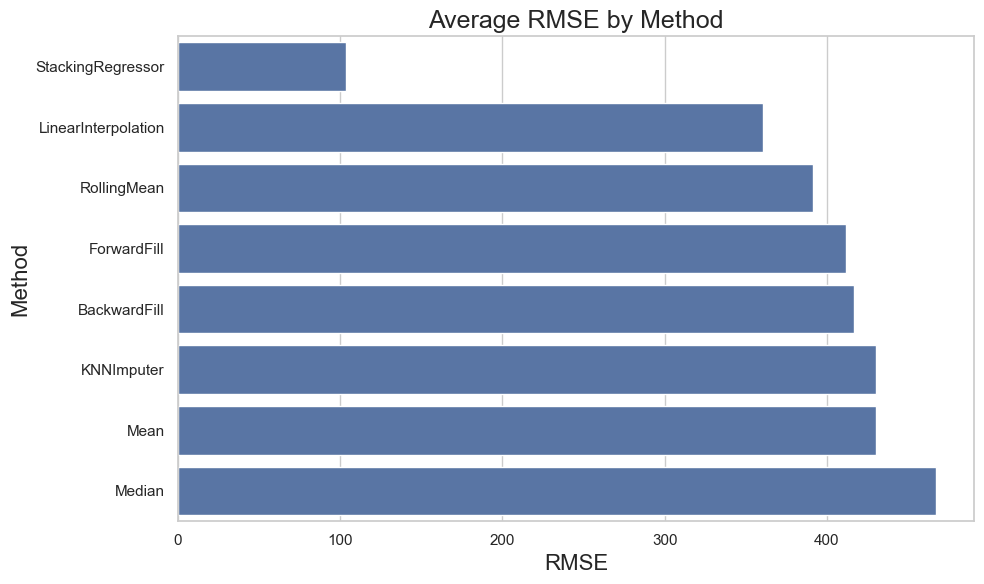

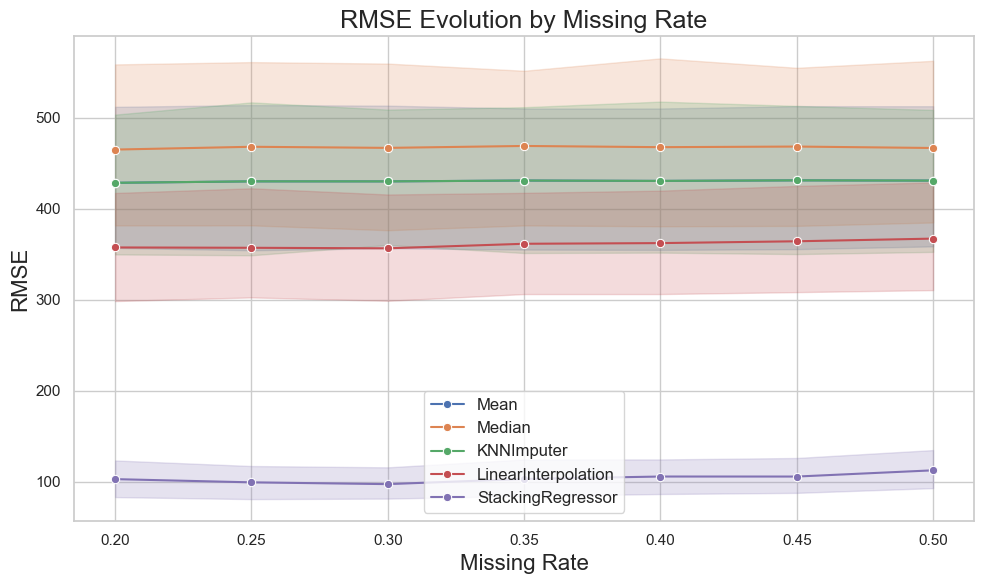

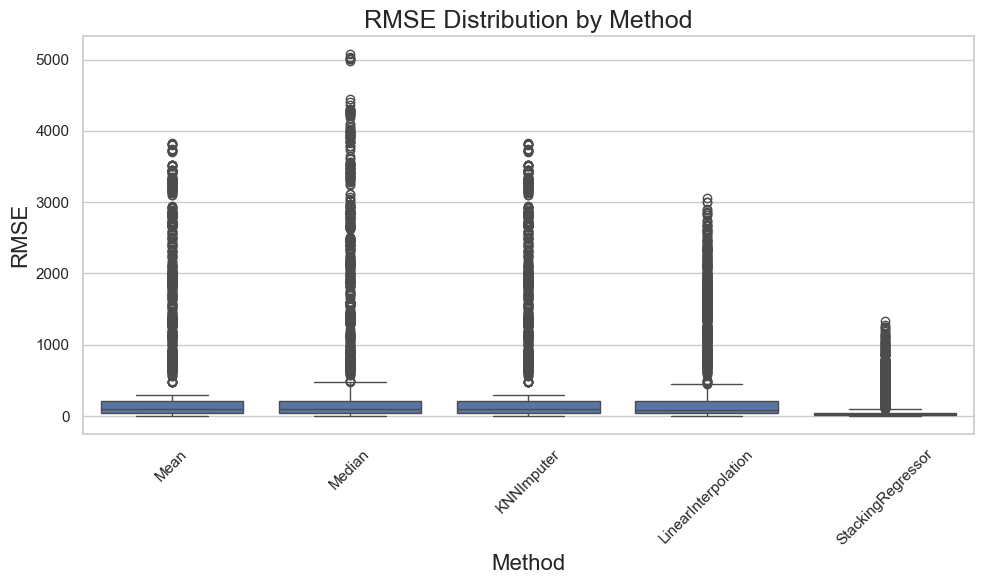

In [6]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

# ==============================
# CONFIGURAÇÕES GERAIS
# ==============================

FONT_CONFIG = {
    'method_names': 14,
    'axis_labels': 16,
    'axis_values': 14,
    'bar_values': 12,
    'legend': 12,
    'title': 18
}

sns.set(style="whitegrid")


# ==============================
# FUNÇÃO DE ANÁLISE FINAL (SEM FILTROS)
# ==============================

def final_robust_analysis(json_file_path):
    """Lê o JSON e cria DataFrame com todas as métricas, sem remover outliers nem duplicatas."""
    with open(json_file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)

    records = []
    all_sources = set()

    for link, missing_data in data.items():
        all_sources.add(link)
        for missing_rate, methods in missing_data.items():
            missing_rate_float = float(missing_rate)

            # Baselines
            for method_name, metrics in methods['baseline'].items():
                records.append({
                    'link': link,
                    'missing_rate': missing_rate_float,
                    'method_type': 'baseline',
                    'method': method_name,
                    'rmse': metrics['rmse'],
                    'nrmse': metrics['nrmse'],
                    'r2': metrics['r2'],
                    'mape': metrics['mape']
                })

            # Stacking
            stacking_metrics = methods['stacking']['mean']['StackingRegressor']
            records.append({
                'link': link,
                'missing_rate': missing_rate_float,
                'method_type': 'stacking',
                'method': 'StackingRegressor',
                'rmse': stacking_metrics['rmse'],
                'nrmse': stacking_metrics['nrmse'],
                'r2': stacking_metrics['r2'],
                'mape': stacking_metrics['mape']
            })

    df = pd.DataFrame(records)

    print("\nFINAL ANALYSIS (NO FILTERING)")
    print("=" * 80)
    print(f"Total links: {len(all_sources)}")
    print(f"Total records: {len(df)}")
    print(f"Methods: {df['method'].nunique()}")
    print(f"Missing rates: {sorted(df['missing_rate'].unique())}")

    df_clean = df.copy()
    print("\nNo outliers or duplicate link filtering applied.")
    print(f"Final dataset size: {len(df_clean)}")

    return df_clean


# ==============================
# TABELA DE EVOLUÇÃO POR MISSING RATE
# ==============================

def print_missing_evolution_tables(df_clean, metodos_selecionados):
    """Exibe dados de evolução das métricas em formato de tabela para LaTeX."""
    print("\n" + "=" * 80)
    print("MISSING RATE EVOLUTION DATA FOR TABLES")
    print("=" * 80)

    missing_rates = sorted(df_clean['missing_rate'].unique())
    print(f"\nDetected missing rates: {missing_rates}")

    metrics = ['rmse', 'nrmse', 'r2', 'mape']
    metric_names = {'rmse': 'RMSE', 'nrmse': 'NRMSE', 'r2': 'R²', 'mape': 'MAPE'}

    for metric in metrics:
        print(f"\n{metric_names[metric]} EVOLUTION BY MISSING RATE:")
        print("-" * 80)
        header = "Missing Rate | " + " | ".join([f"{method:>15}" for method in metodos_selecionados])
        print(header)
        print("-" * len(header))

        pivot_data = df_clean.groupby(['missing_rate', 'method'])[metric].mean().unstack(fill_value=np.nan)
        for method in metodos_selecionados:
            if method not in pivot_data.columns:
                pivot_data[method] = np.nan
        pivot_data = pivot_data[metodos_selecionados]

        for rate in missing_rates:
            if rate in pivot_data.index:
                row_values = []
                for method in metodos_selecionados:
                    value = pivot_data.loc[rate, method]
                    if pd.notna(value):
                        if metric == 'r2':
                            row_values.append(f"{value:>15.3f}")
                        elif metric == 'mape':
                            row_values.append(f"{value:>15.1f}")
                        else:
                            row_values.append(f"{value:>15.2f}")
                    else:
                        row_values.append(f"{'N/A':>15}")
                print(f"{rate:>11.2f} | " + " | ".join(row_values))


# ==============================
# PLOTS
# ==============================

def plot_comparison_final_separado(df_clean, metric='rmse'):
    """Gráfico de barras comparando os métodos (média geral)."""
    plt.figure(figsize=(10, 6))
    mean_metrics = df_clean.groupby('method')[metric].mean().sort_values(ascending=True)
    sns.barplot(x=mean_metrics.values, y=mean_metrics.index)
    plt.xlabel(metric.upper(), fontsize=FONT_CONFIG['axis_labels'])
    plt.ylabel('Method', fontsize=FONT_CONFIG['axis_labels'])
    plt.title(f"Average {metric.upper()} by Method", fontsize=FONT_CONFIG['title'])
    plt.tight_layout()
    plt.show()


def plot_evolution_missing_separado(df_clean, metric='rmse', metodos_selecionados=None):
    """Evolução do desempenho conforme a taxa de missing aumenta."""
    plt.figure(figsize=(10, 6))
    if metodos_selecionados:
        df_filtered = df_clean[df_clean['method'].isin(metodos_selecionados)]
    else:
        df_filtered = df_clean
    sns.lineplot(
        data=df_filtered,
        x='missing_rate',
        y=metric,
        hue='method',
        marker='o'
    )
    plt.title(f"{metric.upper()} Evolution by Missing Rate", fontsize=FONT_CONFIG['title'])
    plt.xlabel('Missing Rate', fontsize=FONT_CONFIG['axis_labels'])
    plt.ylabel(metric.upper(), fontsize=FONT_CONFIG['axis_labels'])
    plt.legend(fontsize=FONT_CONFIG['legend'])
    plt.tight_layout()
    plt.show()


def plot_boxplot_comparison_separado(df_clean, metric='rmse', metodos_selecionados=None):
    """Boxplot comparando distribuição das métricas entre os métodos."""
    plt.figure(figsize=(10, 6))
    if metodos_selecionados:
        df_filtered = df_clean[df_clean['method'].isin(metodos_selecionados)]
    else:
        df_filtered = df_clean
    sns.boxplot(
        data=df_filtered,
        x='method',
        y=metric
    )
    plt.title(f"{metric.upper()} Distribution by Method", fontsize=FONT_CONFIG['title'])
    plt.xlabel('Method', fontsize=FONT_CONFIG['axis_labels'])
    plt.ylabel(metric.upper(), fontsize=FONT_CONFIG['axis_labels'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# ==============================
# EXECUÇÃO PRINCIPAL
# ==============================

# Caminho para o seu arquivo JSON
json_path = Path("../../results/results_filtered.json")

# Gera o DataFrame completo
df_clean = final_robust_analysis(json_path)

# Lista de métodos que você quer destacar
metodos_selecionados = [
    'Mean', 'Median', 'KNNImputer', 'LinearInterpolation', 'StackingRegressor'
]

# Exibir tabela de evolução
print_missing_evolution_tables(df_clean, metodos_selecionados)

# Exemplos de gráficos:
plot_comparison_final_separado(df_clean, metric='rmse')
plot_evolution_missing_separado(df_clean, metric='rmse', metodos_selecionados=metodos_selecionados)
plot_boxplot_comparison_separado(df_clean, metric='rmse', metodos_selecionados=metodos_selecionados)


### Esse eh o resultado para todos os links 
### Removendo as sources que sao repetidas (ex: ac-am e am-ac) - deixa apenas uma 
### Rmovendo rolling mean e linear interpoaltion

IDENTIFYING AND SELECTING UNIQUE LINKS...
LINK STATISTICS:
   Total original links: 407
   Unique link groups: 234
   Links with duplicates: 173
   Unique links: 61

GROUP ac-am: ['ac-am', 'am-ac']
   ac-am: NRMSE=4.91, R2=0.913
   am-ac: NRMSE=3.07, R2=0.954
   SELECTED: am-ac (NRMSE: 3.07, R2: 0.954)

GROUP ac-ap: ['ac-ap', 'ap-ac']
   ac-ap: NRMSE=6.07, R2=0.893
   ap-ac: NRMSE=3.29, R2=0.949
   SELECTED: ap-ac (NRMSE: 3.29, R2: 0.949)

GROUP ac-ba: ['ac-ba', 'ba-ac']
   ac-ba: NRMSE=4.81, R2=0.876
   ba-ac: NRMSE=3.78, R2=0.909
   SELECTED: ba-ac (NRMSE: 3.78, R2: 0.909)

GROUP ac-ce: ['ac-ce', 'ce-ac']
   ac-ce: NRMSE=4.15, R2=0.871
   ce-ac: NRMSE=3.06, R2=0.933
   SELECTED: ce-ac (NRMSE: 3.06, R2: 0.933)

GROUP ac-es: ['ac-es', 'es-ac']
   ac-es: NRMSE=4.44, R2=0.854
   es-ac: NRMSE=2.45, R2=0.961
   SELECTED: es-ac (NRMSE: 2.45, R2: 0.961)

GROUP ac-go: ['ac-go', 'go-ac']
   ac-go: NRMSE=4.91, R2=0.796
   go-ac: NRMSE=3.06, R2=0.925
   SELECTED: go-ac (NRMSE: 3.06, R2: 0.925)



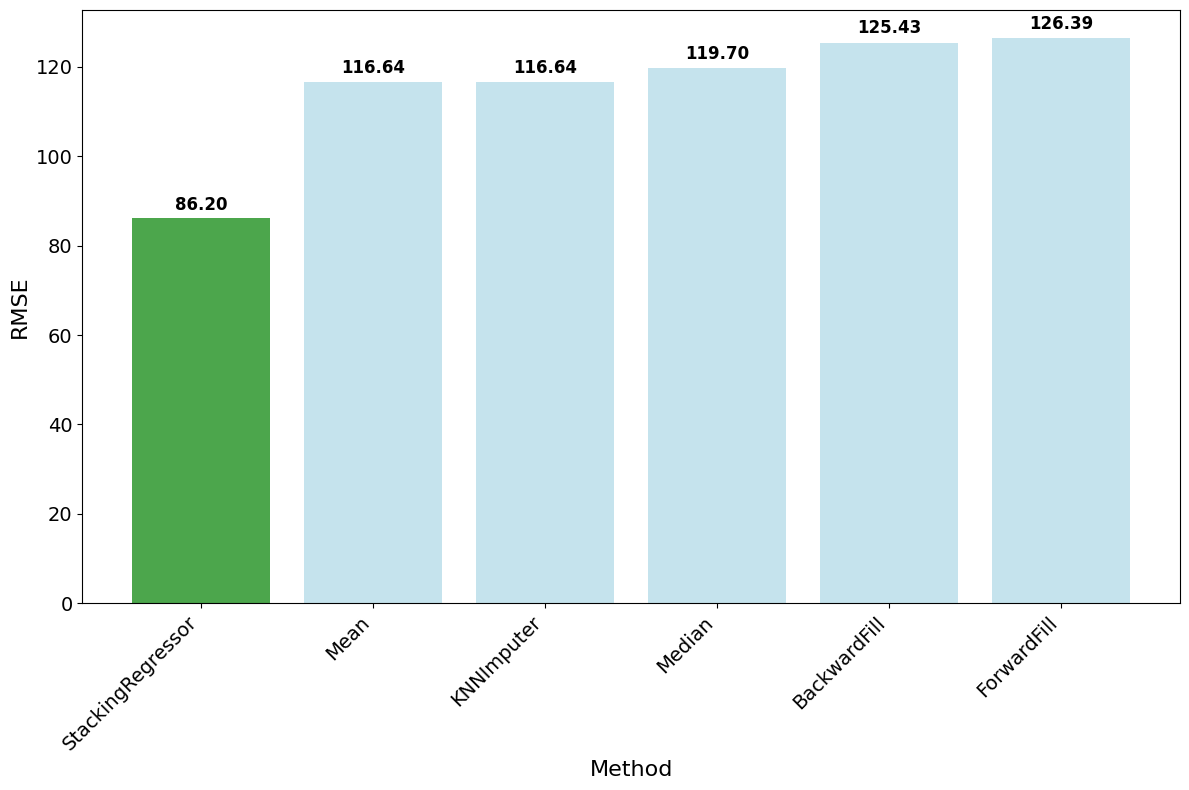

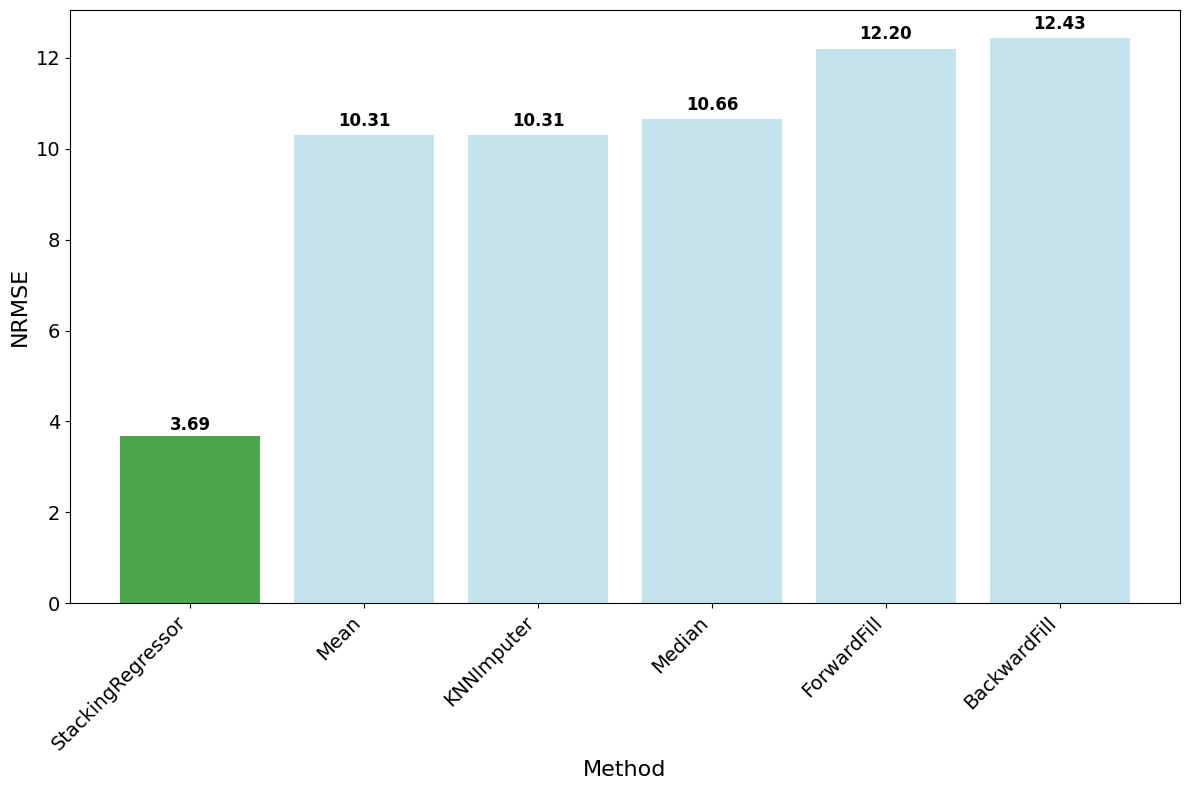

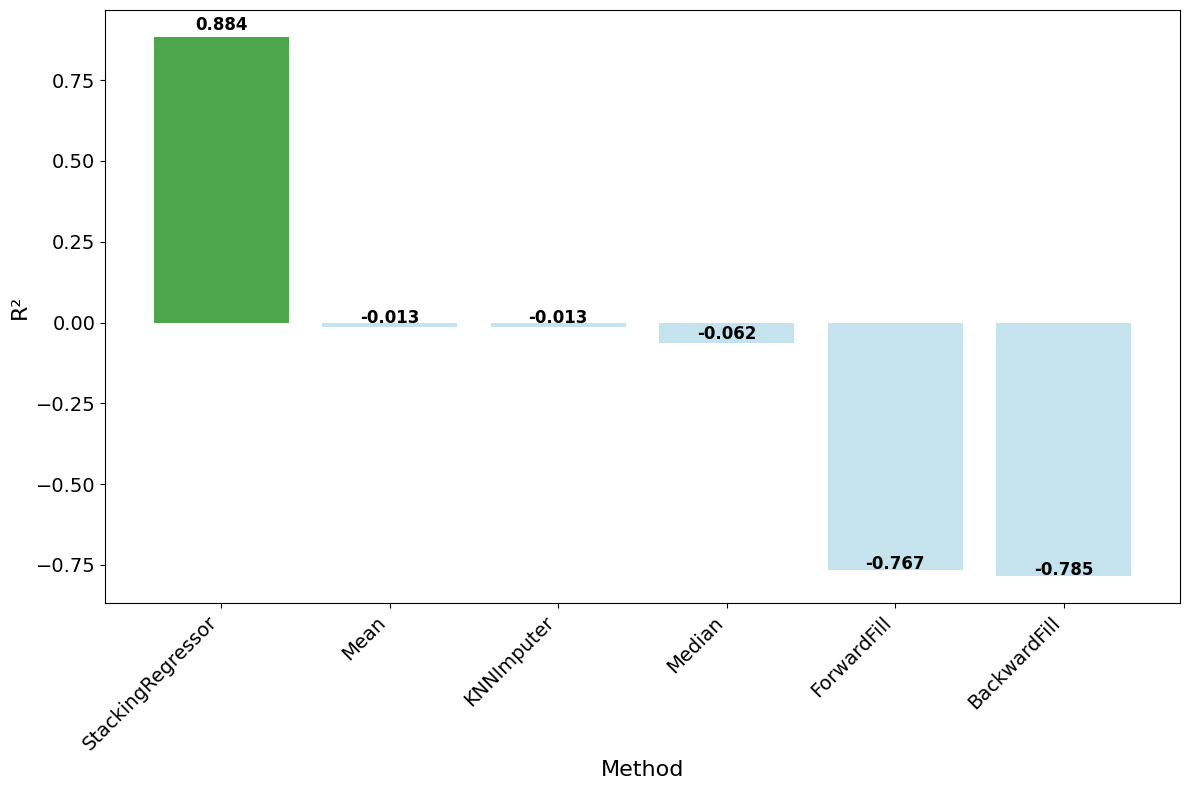

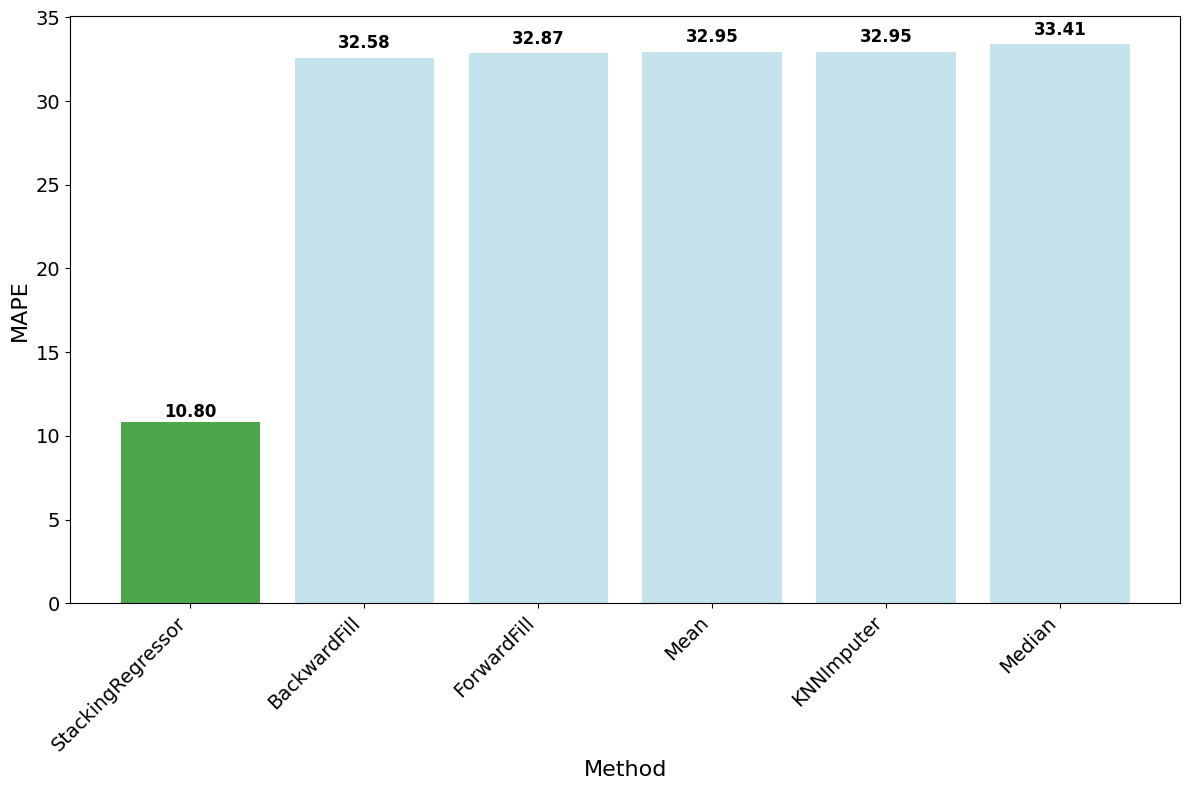


GENERATING SEPARATE MISSING RATE EVOLUTION PLOTS...


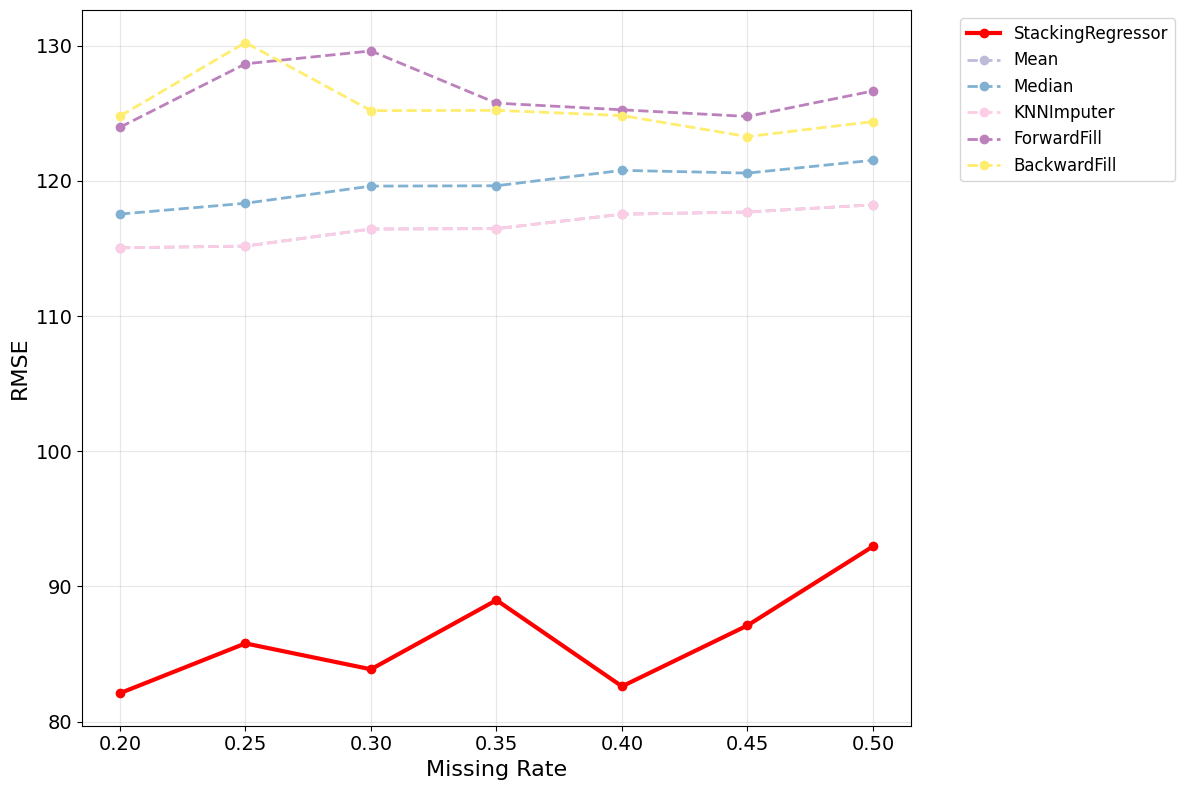

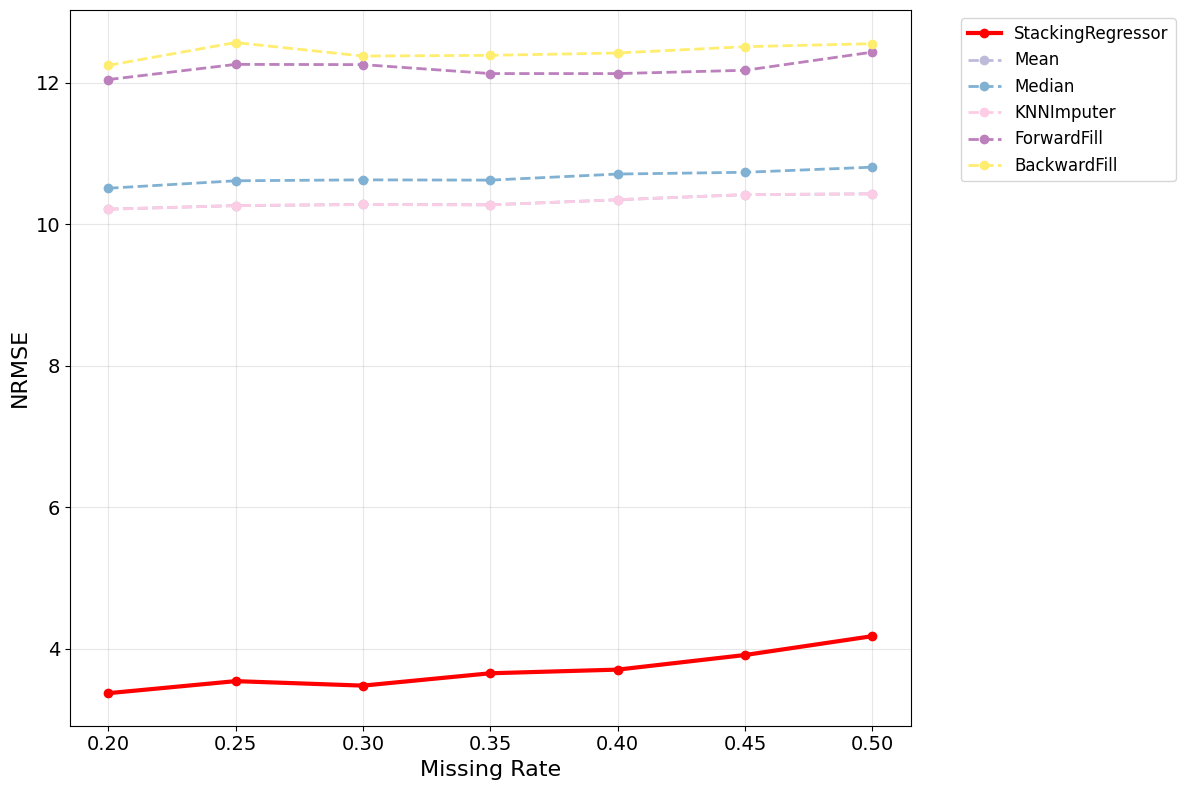

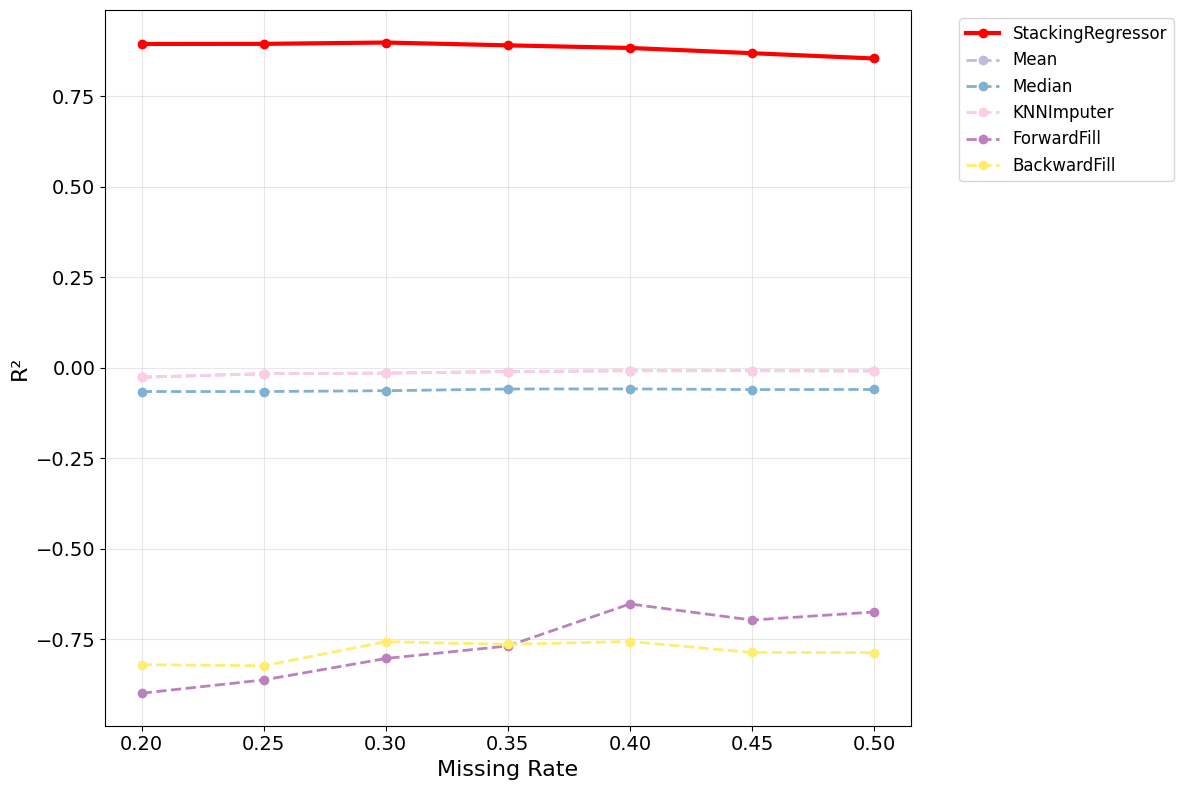

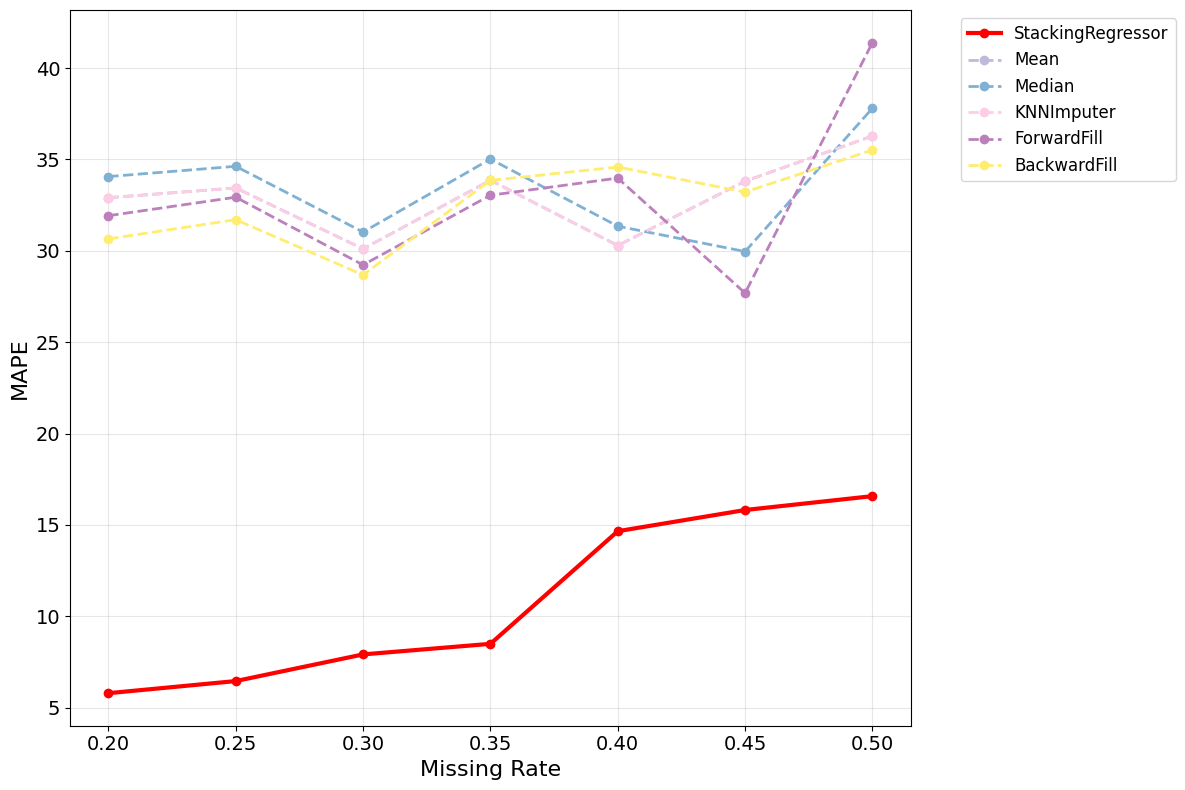


GENERATING SEPARATE BOXPLOTS...


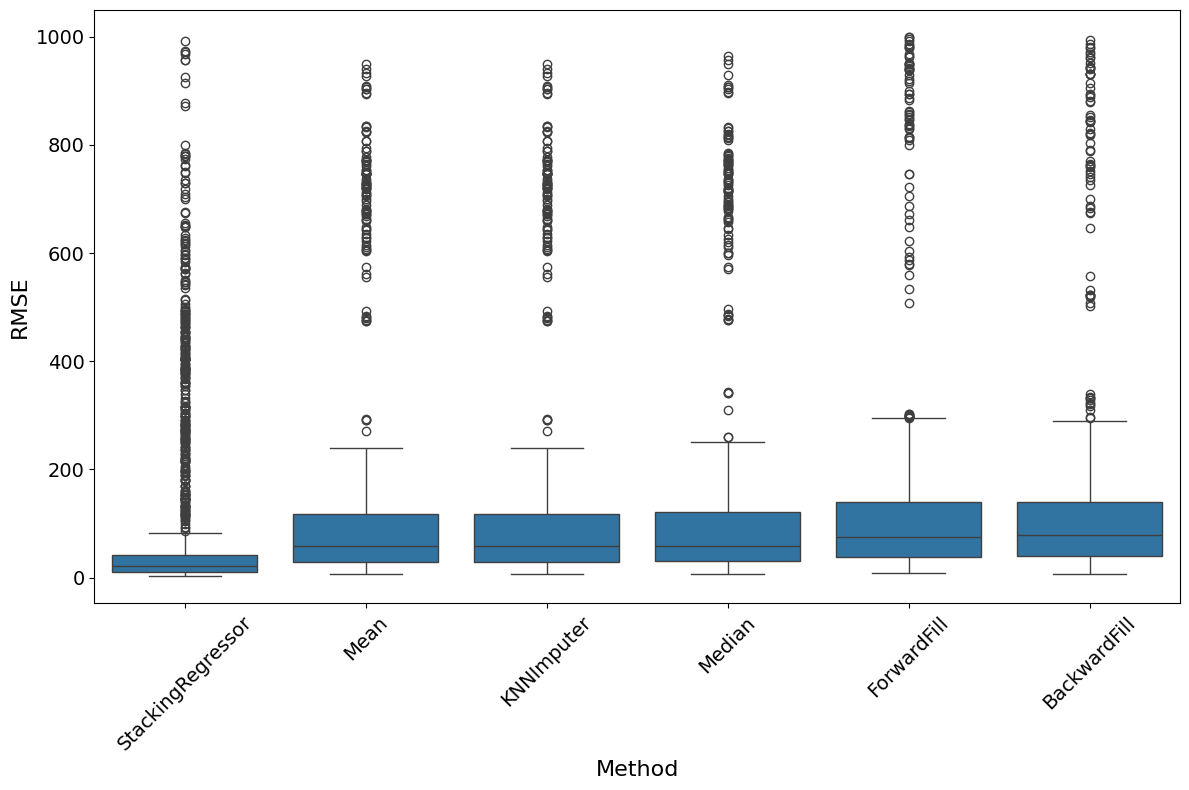

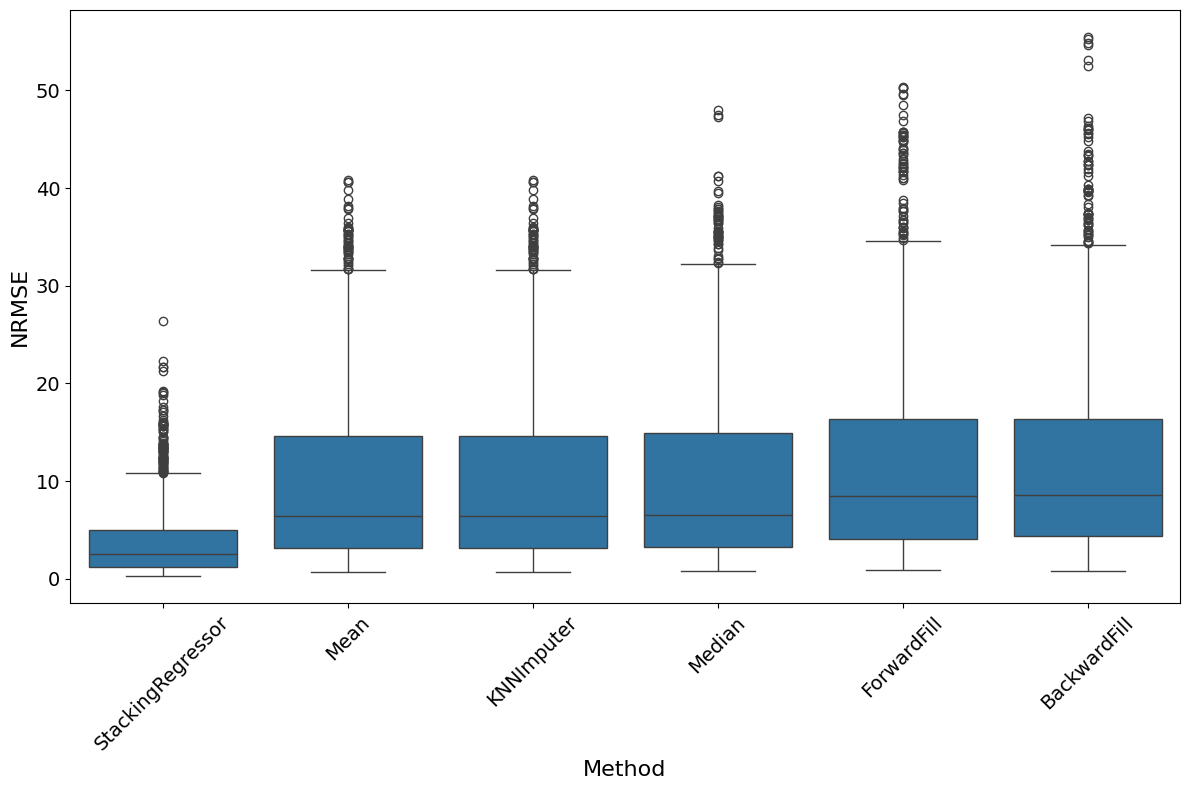

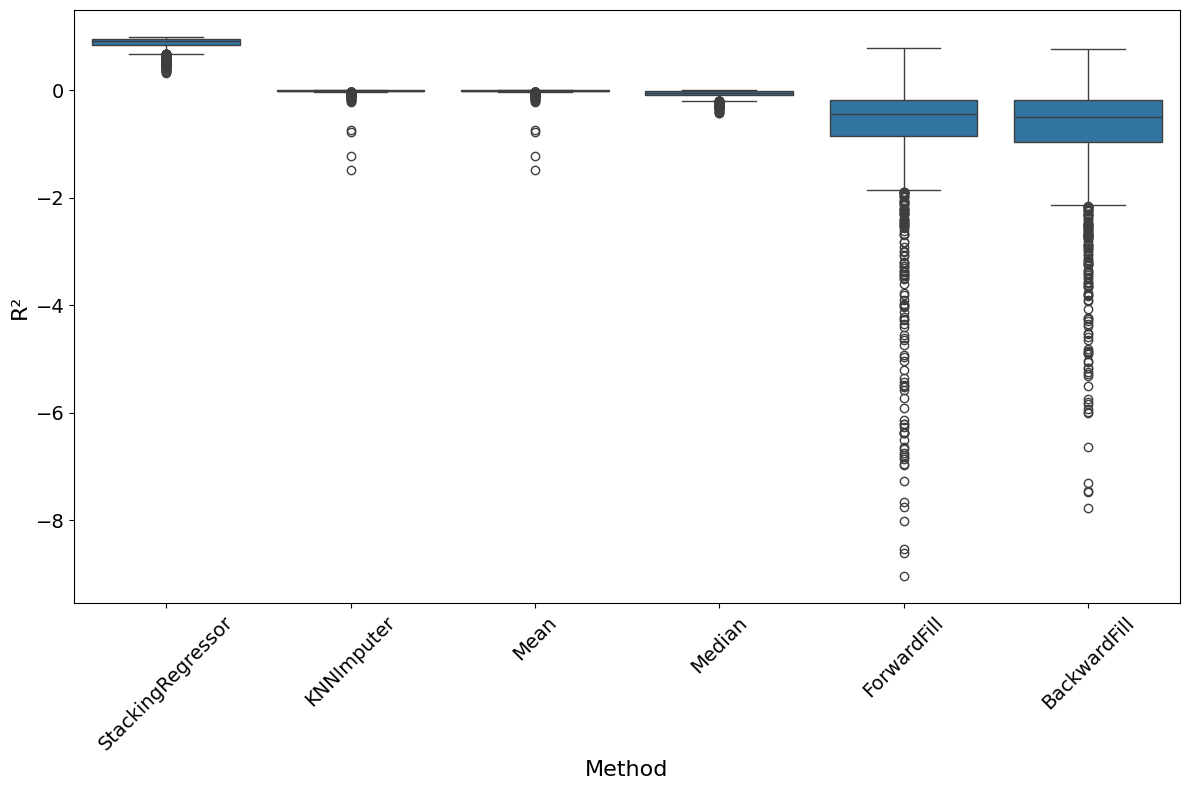

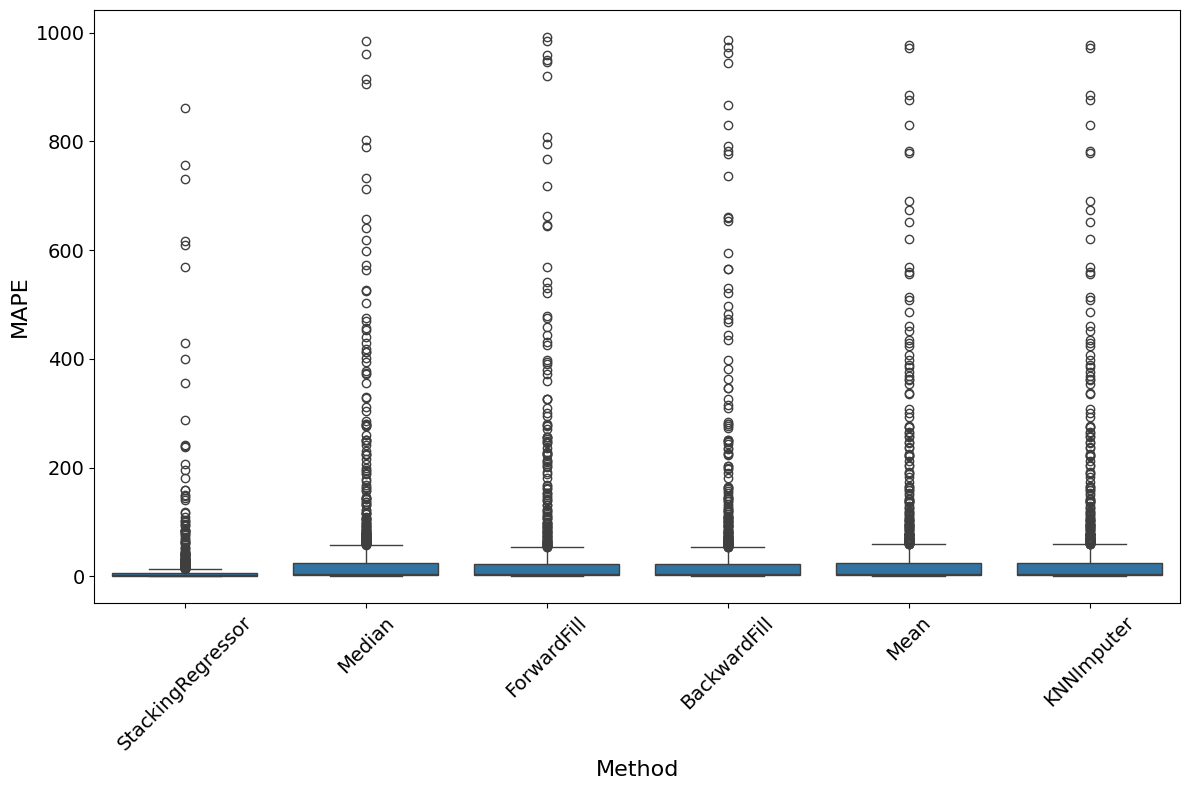


SUMMARY FOR SCIENTIFIC PAPER

EXPERIMENTAL METHODOLOGY:
   Unique data sources: 234
   Duplicate links removed: 173
   Compared methods: 6
   Valid configurations analyzed: 11223

BEST BASELINE: Mean

DETAILED STATISTICAL COMPARISON:

RMSE: 86.20 vs 116.64 (26.1% better)
NRMSE: 3.69 vs 10.31 (64.2% better)
R2: 0.884 vs -0.013 (0.897 points better)

SAVED FILES:
   - 'dados_limpos_links_unicos.csv'
   - 'estatisticas_links_unicos.csv'
   - 'links_selecionados_analise.txt' (complete list)

COMPARISON PLOTS:
   - 'comparacao_rmse.png'
   - 'comparacao_nrmse.png'
   - 'comparacao_r2.png'
   - 'comparacao_mape.png'

EVOLUTION PLOTS:
   - 'evolucao_rmse.png'
   - 'evolucao_nrmse.png'
   - 'evolucao_r2.png'
   - 'evolucao_mape.png'

BOXPLOTS:
   - 'boxplot_rmse.png'
   - 'boxplot_nrmse.png'
   - 'boxplot_r2.png'
   - 'boxplot_mape.png'
Total valid records: 11223


In [4]:

import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Configurações de fonte parametrizáveis
FONT_CONFIG = {
    'method_names': 14,      # Tamanho da fonte para nomes dos métodos
    'axis_labels': 16,       # Tamanho da fonte para labels dos eixos
    'axis_values': 14,       # Tamanho da fonte para valores dos eixos
    'bar_values': 12,        # Tamanho da fonte para valores nas barras
    'legend': 12,            # Tamanho da fonte para legenda
    'title': 18              # Tamanho da fonte para títulos (se necessário)
}

def identificar_links_duplicados(data):
    """
    Identifica links duplicados (ex: ac-am e am-ac) e seleciona o melhor
    baseado no critério: melhor NRMSE do Stacking, depois melhor R²
    """
    print("IDENTIFYING AND SELECTING UNIQUE LINKS...")
    print("=" * 60)
    
    # Criar dicionário para agrupar links duplicados
    links_agrupados = {}
    
    for link in data.keys():
        # Criar chave normalizada (ordenar os nós)
        nodes = link.split('-')
        key = '-'.join(sorted(nodes))
        
        if key not in links_agrupados:
            links_agrupados[key] = []
        links_agrupados[key].append(link)
    
    # Identificar links com duplicatas
    links_duplicados = {k: v for k, v in links_agrupados.items() if len(v) > 1}
    links_unicos = {k: v[0] for k, v in links_agrupados.items() if len(v) == 1}
    
    print(f"LINK STATISTICS:")
    print(f"   Total original links: {len(data)}")
    print(f"   Unique link groups: {len(links_agrupados)}")
    print(f"   Links with duplicates: {len(links_duplicados)}")
    print(f"   Unique links: {len(links_unicos)}")
    
    # Selecionar o melhor link de cada grupo duplicado
    links_selecionados = {}
    
    for grupo, links in links_duplicados.items():
        print(f"\nGROUP {grupo}: {links}")
        
        melhor_link = None
        melhor_nrmse = float('inf')
        melhor_r2 = -float('inf')
        
        for link in links:
            # Calcular média do NRMSE e R² do Stacking para este link
            nrmse_values = []
            r2_values = []
            
            for missing_rate, methods in data[link].items():
                stacking_metrics = methods['stacking']['mean']['StackingRegressor']
                if stacking_metrics['nrmse'] is not None:
                    nrmse_values.append(stacking_metrics['nrmse'])
                if stacking_metrics['r2'] is not None:
                    r2_values.append(stacking_metrics['r2'])
            
            if nrmse_values and r2_values:
                avg_nrmse = np.mean(nrmse_values)
                avg_r2 = np.mean(r2_values)
                
                print(f"   {link}: NRMSE={avg_nrmse:.2f}, R2={avg_r2:.3f}")
                
                # Critério de seleção: primeiro NRMSE, depois R²
                if (avg_nrmse < melhor_nrmse) or (avg_nrmse == melhor_nrmse and avg_r2 > melhor_r2):
                    melhor_link = link
                    melhor_nrmse = avg_nrmse
                    melhor_r2 = avg_r2
        
        if melhor_link:
            links_selecionados[grupo] = melhor_link
            print(f"   SELECTED: {melhor_link} (NRMSE: {melhor_nrmse:.2f}, R2: {melhor_r2:.3f})")
        else:
            # Se nenhum tem métricas válidas, seleciona o primeiro
            links_selecionados[grupo] = links[0]
            print(f"   SELECTED: {links[0]} (no valid metrics)")
    
    # Adicionar links únicos
    for grupo, link in links_unicos.items():
        links_selecionados[grupo] = link
    
    # Criar novo dicionário com dados filtrados
    data_filtrado = {}
    for grupo, link in links_selecionados.items():
        data_filtrado[link] = data[link]
    
    print(f"\nSELECTION RESULT:")
    print(f"   Original links: {len(data)}")
    print(f"   Links after filter: {len(data_filtrado)}")
    print(f"   Reduction: {len(data) - len(data_filtrado)} links removed")
    
    # Salvar lista de links selecionados
    with open('links_selecionados_analise.txt', 'w', encoding='utf-8') as f:
        f.write("SELECTED LINKS FOR FINAL ANALYSIS\n")
        f.write("=" * 50 + "\n")
        f.write(f"Total: {len(data_filtrado)} links\n\n")
        
        # Escrever grupos com duplicatas
        if links_duplicados:
            f.write("GROUPS WITH DUPLICATES (only selected):\n")
            for grupo, links in links_duplicados.items():
                selecionado = links_selecionados[grupo]
                f.write(f"  {grupo}:\n")
                for link in links:
                    if link == selecionado:
                        f.write(f"    [SELECTED] {link}\n")
                    else:
                        f.write(f"    [REMOVED]  {link}\n")
                f.write("\n")
        
        # Escrever links únicos
        f.write("UNIQUE LINKS:\n")
        for grupo, link in links_unicos.items():
            f.write(f"  [UNIQUE] {link}\n")
    
    return data_filtrado, links_selecionados

def print_missing_evolution_tables(df_clean, metodos_selecionados):
    """Print evolution data by missing rate in table format for Overleaf"""
    print("\n" + "=" * 80)
    print("MISSING RATE EVOLUTION DATA FOR TABLES")
    print("=" * 80)
    
    # Get unique missing rates sorted
    missing_rates = sorted(df_clean['missing_rate'].unique())
    
    print(f"\nDETECTED MISSING RATES: {missing_rates}")
    print(f"Total unique rates: {len(missing_rates)}")
    
    # Métricas para análise
    metrics = ['rmse', 'nrmse', 'r2', 'mape']
    metric_names = {'rmse': 'RMSE', 'nrmse': 'NRMSE', 'r2': 'R²', 'mape': 'MAPE'}
    
    for metric in metrics:
        print(f"\n{metric_names[metric]} EVOLUTION BY MISSING RATE:")
        print("-" * 80)
        
        # Create table header
        header = "Missing Rate | " + " | ".join([f"{method:>15}" for method in metodos_selecionados])
        print(header)
        print("-" * len(header))
        
        # AGRUPAR PRIMEIRO - cria uma tabela pivô com missing_rate x method
        pivot_data = df_clean.groupby(['missing_rate', 'method'])[metric].mean().unstack(fill_value=np.nan)
        
        # Garantir que todos os métodos estão presentes
        for method in metodos_selecionados:
            if method not in pivot_data.columns:
                pivot_data[method] = np.nan
        
        # Ordenar colunas conforme metodos_selecionados
        pivot_data = pivot_data[metodos_selecionados]
        
        # Imprimir cada linha (uma por missing rate)
        for rate in missing_rates:
            if rate in pivot_data.index:
                row_values = []
                for method in metodos_selecionados:
                    value = pivot_data.loc[rate, method]
                    if pd.notna(value):
                        if metric == 'r2':
                            row_values.append(f"{value:>15.3f}")
                        elif metric == 'mape':
                            row_values.append(f"{value:>15.1f}")
                        else:
                            row_values.append(f"{value:>15.2f}")
                    else:
                        row_values.append(f"{'N/A':>15}")
                
                print(f"{rate:>11.2f} | " + " | ".join(row_values))
            
def plot_comparison_final_separado(df_clean, metodos_selecionados):
    """Plot separado: Comparação final entre métodos - UMA FIGURA POR MÉTRICA"""
    print("\nGENERATING SEPARATE COMPARISON PLOTS...")
    
    comparison_data = []
    for method in metodos_selecionados:
        method_data = df_clean[df_clean['method'] == method]
        if len(method_data) > 0:
            comparison_data.append({
                'method': method,
                'rmse': method_data['rmse'].mean(),
                'nrmse': method_data['nrmse'].mean(),
                'r2': method_data['r2'].mean(),
                'mape': method_data['mape'].mean()
            })
    
    comp_df = pd.DataFrame(comparison_data)
    
    # Plot RMSE - SEPARATE FIGURE
    plt.figure(figsize=(12, 8))
    sorted_df = comp_df.sort_values('rmse', ascending=True)
    colors = ['green' if x == 'StackingRegressor' else 'lightblue' for x in sorted_df['method']]
    bars = plt.bar(range(len(sorted_df)), sorted_df['rmse'], color=colors, alpha=0.7)
    plt.ylabel('RMSE', fontsize=FONT_CONFIG['axis_labels'])
    plt.xlabel('Method', fontsize=FONT_CONFIG['axis_labels'])
    plt.xticks(range(len(sorted_df)), sorted_df['method'], rotation=45, ha='right', 
               fontsize=FONT_CONFIG['method_names'])
    plt.yticks(fontsize=FONT_CONFIG['axis_values'])
    
    for bar, value in zip(bars, sorted_df['rmse']):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + height*0.01,
                f'{value:.2f}', ha='center', va='bottom', 
                fontweight='bold', fontsize=FONT_CONFIG['bar_values'])
    
    plt.tight_layout()
    plt.savefig('comparacao_rmse.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    
    # Plot NRMSE - SEPARATE FIGURE
    plt.figure(figsize=(12, 8))
    sorted_df = comp_df.sort_values('nrmse', ascending=True)
    colors = ['green' if x == 'StackingRegressor' else 'lightblue' for x in sorted_df['method']]
    bars = plt.bar(range(len(sorted_df)), sorted_df['nrmse'], color=colors, alpha=0.7)
    plt.ylabel('NRMSE', fontsize=FONT_CONFIG['axis_labels'])
    plt.xlabel('Method', fontsize=FONT_CONFIG['axis_labels'])
    plt.xticks(range(len(sorted_df)), sorted_df['method'], rotation=45, ha='right', 
               fontsize=FONT_CONFIG['method_names'])
    plt.yticks(fontsize=FONT_CONFIG['axis_values'])
    
    for bar, value in zip(bars, sorted_df['nrmse']):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + height*0.01,
                f'{value:.2f}', ha='center', va='bottom', 
                fontweight='bold', fontsize=FONT_CONFIG['bar_values'])
    
    plt.tight_layout()
    plt.savefig('comparacao_nrmse.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    
    # Plot R2 - SEPARATE FIGURE
    plt.figure(figsize=(12, 8))
    sorted_df = comp_df.sort_values('r2', ascending=False)
    colors = ['green' if x == 'StackingRegressor' else 'lightblue' for x in sorted_df['method']]
    bars = plt.bar(range(len(sorted_df)), sorted_df['r2'], color=colors, alpha=0.7)
    plt.ylabel('R²', fontsize=FONT_CONFIG['axis_labels'])
    plt.xlabel('Method', fontsize=FONT_CONFIG['axis_labels'])
    plt.xticks(range(len(sorted_df)), sorted_df['method'], rotation=45, ha='right', 
               fontsize=FONT_CONFIG['method_names'])
    plt.yticks(fontsize=FONT_CONFIG['axis_values'])
    
    for bar, value in zip(bars, sorted_df['r2']):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + height*0.01,
                f'{value:.3f}', ha='center', va='bottom', 
                fontweight='bold', fontsize=FONT_CONFIG['bar_values'])
    
    plt.tight_layout()
    plt.savefig('comparacao_r2.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    
    # Plot MAPE - SEPARATE FIGURE
    plt.figure(figsize=(12, 8))
    sorted_df = comp_df.sort_values('mape', ascending=True)
    colors = ['green' if x == 'StackingRegressor' else 'lightblue' for x in sorted_df['method']]
    bars = plt.bar(range(len(sorted_df)), sorted_df['mape'], color=colors, alpha=0.7)
    plt.ylabel('MAPE', fontsize=FONT_CONFIG['axis_labels'])
    plt.xlabel('Method', fontsize=FONT_CONFIG['axis_labels'])
    plt.xticks(range(len(sorted_df)), sorted_df['method'], rotation=45, ha='right', 
               fontsize=FONT_CONFIG['method_names'])
    plt.yticks(fontsize=FONT_CONFIG['axis_values'])
    
    for bar, value in zip(bars, sorted_df['mape']):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + height*0.01,
                f'{value:.2f}', ha='center', va='bottom', 
                fontweight='bold', fontsize=FONT_CONFIG['bar_values'])
    
    plt.tight_layout()
    plt.savefig('comparacao_mape.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

def plot_evolution_missing_separado(df_clean, metodos_selecionados):
    """Plot separado: Performance por taxa de missing - UMA FIGURA POR MÉTRICA"""
    print("\nGENERATING SEPARATE MISSING RATE EVOLUTION PLOTS...")
    
    # Cores distintas para cada método selecionado
    colors = plt.cm.Set3(np.linspace(0, 1, len(metodos_selecionados)))
    color_map = {method: color for method, color in zip(metodos_selecionados, colors)}
    
    # Plot RMSE - SEPARATE FIGURE
    plt.figure(figsize=(12, 8))
    for method in metodos_selecionados:
        method_data = df_clean[df_clean['method'] == method]
        if len(method_data) > 0:
            performance_by_missing = method_data.groupby('missing_rate')['rmse'].mean().sort_index()
            
            # Usar cor vermelha para Stacking, outras cores para baselines
            color = 'red' if method == 'StackingRegressor' else color_map[method]
            linewidth = 3 if method == 'StackingRegressor' else 2
            linestyle = '-' if method == 'StackingRegressor' else '--'
            
            plt.plot(performance_by_missing.index, performance_by_missing.values, 
                    marker='o', linewidth=linewidth, label=method, 
                    markersize=6, color=color, linestyle=linestyle)
    
    plt.xlabel('Missing Rate', fontsize=FONT_CONFIG['axis_labels'])
    plt.ylabel('RMSE', fontsize=FONT_CONFIG['axis_labels'])
    plt.xticks(fontsize=FONT_CONFIG['axis_values'])
    plt.yticks(fontsize=FONT_CONFIG['axis_values'])
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=FONT_CONFIG['legend'])
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('evolucao_rmse.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    
    # Plot NRMSE - SEPARATE FIGURE
    plt.figure(figsize=(12, 8))
    for method in metodos_selecionados:
        method_data = df_clean[df_clean['method'] == method]
        if len(method_data) > 0:
            performance_by_missing = method_data.groupby('missing_rate')['nrmse'].mean().sort_index()
            
            color = 'red' if method == 'StackingRegressor' else color_map[method]
            linewidth = 3 if method == 'StackingRegressor' else 2
            linestyle = '-' if method == 'StackingRegressor' else '--'
            
            plt.plot(performance_by_missing.index, performance_by_missing.values, 
                    marker='o', linewidth=linewidth, label=method, 
                    markersize=6, color=color, linestyle=linestyle)
    
    plt.xlabel('Missing Rate', fontsize=FONT_CONFIG['axis_labels'])
    plt.ylabel('NRMSE', fontsize=FONT_CONFIG['axis_labels'])
    plt.xticks(fontsize=FONT_CONFIG['axis_values'])
    plt.yticks(fontsize=FONT_CONFIG['axis_values'])
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=FONT_CONFIG['legend'])
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('evolucao_nrmse.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    
    # Plot R2 - SEPARATE FIGURE
    plt.figure(figsize=(12, 8))
    for method in metodos_selecionados:
        method_data = df_clean[df_clean['method'] == method]
        if len(method_data) > 0:
            performance_by_missing = method_data.groupby('missing_rate')['r2'].mean().sort_index()
            
            color = 'red' if method == 'StackingRegressor' else color_map[method]
            linewidth = 3 if method == 'StackingRegressor' else 2
            linestyle = '-' if method == 'StackingRegressor' else '--'
            
            plt.plot(performance_by_missing.index, performance_by_missing.values, 
                    marker='o', linewidth=linewidth, label=method, 
                    markersize=6, color=color, linestyle=linestyle)
    
    plt.xlabel('Missing Rate', fontsize=FONT_CONFIG['axis_labels'])
    plt.ylabel('R²', fontsize=FONT_CONFIG['axis_labels'])
    plt.xticks(fontsize=FONT_CONFIG['axis_values'])
    plt.yticks(fontsize=FONT_CONFIG['axis_values'])
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=FONT_CONFIG['legend'])
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('evolucao_r2.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    
    # Plot MAPE - SEPARATE FIGURE
    plt.figure(figsize=(12, 8))
    for method in metodos_selecionados:
        method_data = df_clean[df_clean['method'] == method]
        if len(method_data) > 0:
            performance_by_missing = method_data.groupby('missing_rate')['mape'].mean().sort_index()
            
            color = 'red' if method == 'StackingRegressor' else color_map[method]
            linewidth = 3 if method == 'StackingRegressor' else 2
            linestyle = '-' if method == 'StackingRegressor' else '--'
            
            plt.plot(performance_by_missing.index, performance_by_missing.values, 
                    marker='o', linewidth=linewidth, label=method, 
                    markersize=6, color=color, linestyle=linestyle)
    
    plt.xlabel('Missing Rate', fontsize=FONT_CONFIG['axis_labels'])
    plt.ylabel('MAPE', fontsize=FONT_CONFIG['axis_labels'])
    plt.xticks(fontsize=FONT_CONFIG['axis_values'])
    plt.yticks(fontsize=FONT_CONFIG['axis_values'])
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=FONT_CONFIG['legend'])
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('evolucao_mape.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

def plot_boxplot_comparison_separado(df_clean, metodos_selecionados):
    """Plot separado: Boxplot comparativo - UMA FIGURA POR MÉTRICA"""
    print("\nGENERATING SEPARATE BOXPLOTS...")
    
    # Filtrar apenas métodos selecionados
    df_selected = df_clean[df_clean['method'].isin(metodos_selecionados)]
    
    # Plot RMSE - SEPARATE FIGURE
    plt.figure(figsize=(12, 8))
    method_order = df_selected.groupby('method')['rmse'].median().sort_values().index
    sns.boxplot(data=df_selected, x='method', y='rmse', order=method_order)
    plt.xlabel('Method', fontsize=FONT_CONFIG['axis_labels'])
    plt.ylabel('RMSE', fontsize=FONT_CONFIG['axis_labels'])
    plt.xticks(rotation=45, fontsize=FONT_CONFIG['method_names'])
    plt.yticks(fontsize=FONT_CONFIG['axis_values'])
    
    # Destacar Stacking
    ax = plt.gca()
    for i, artist in enumerate(ax.artists):
        if method_order[i] == 'StackingRegressor':
            artist.set_facecolor('lightgreen')
            artist.set_edgecolor('darkgreen')
            artist.set_linewidth(2)
    
    plt.tight_layout()
    plt.savefig('boxplot_rmse.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    
    # Plot NRMSE - SEPARATE FIGURE
    plt.figure(figsize=(12, 8))
    method_order = df_selected.groupby('method')['nrmse'].median().sort_values().index
    sns.boxplot(data=df_selected, x='method', y='nrmse', order=method_order)
    plt.xlabel('Method', fontsize=FONT_CONFIG['axis_labels'])
    plt.ylabel('NRMSE', fontsize=FONT_CONFIG['axis_labels'])
    plt.xticks(rotation=45, fontsize=FONT_CONFIG['method_names'])
    plt.yticks(fontsize=FONT_CONFIG['axis_values'])
    
    # Destacar Stacking
    ax = plt.gca()
    for i, artist in enumerate(ax.artists):
        if method_order[i] == 'StackingRegressor':
            artist.set_facecolor('lightgreen')
            artist.set_edgecolor('darkgreen')
            artist.set_linewidth(2)
    
    plt.tight_layout()
    plt.savefig('boxplot_nrmse.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    
    # Plot R2 - SEPARATE FIGURE
    plt.figure(figsize=(12, 8))
    method_order = df_selected.groupby('method')['r2'].median().sort_values(ascending=False).index
    sns.boxplot(data=df_selected, x='method', y='r2', order=method_order)
    plt.xlabel('Method', fontsize=FONT_CONFIG['axis_labels'])
    plt.ylabel('R²', fontsize=FONT_CONFIG['axis_labels'])
    plt.xticks(rotation=45, fontsize=FONT_CONFIG['method_names'])
    plt.yticks(fontsize=FONT_CONFIG['axis_values'])
    
    # Destacar Stacking
    ax = plt.gca()
    for i, artist in enumerate(ax.artists):
        if method_order[i] == 'StackingRegressor':
            artist.set_facecolor('lightgreen')
            artist.set_edgecolor('darkgreen')
            artist.set_linewidth(2)
    
    plt.tight_layout()
    plt.savefig('boxplot_r2.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    
    # Plot MAPE - SEPARATE FIGURE
    plt.figure(figsize=(12, 8))
    method_order = df_selected.groupby('method')['mape'].median().sort_values().index
    sns.boxplot(data=df_selected, x='method', y='mape', order=method_order)
    plt.xlabel('Method', fontsize=FONT_CONFIG['axis_labels'])
    plt.ylabel('MAPE', fontsize=FONT_CONFIG['axis_labels'])
    plt.xticks(rotation=45, fontsize=FONT_CONFIG['method_names'])
    plt.yticks(fontsize=FONT_CONFIG['axis_values'])
    
    # Destacar Stacking
    ax = plt.gca()
    for i, artist in enumerate(ax.artists):
        if method_order[i] == 'StackingRegressor':
            artist.set_facecolor('lightgreen')
            artist.set_edgecolor('darkgreen')
            artist.set_linewidth(2)
    
    plt.tight_layout()
    plt.savefig('boxplot_mape.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

def final_robust_analysis(json_file_path):
    """Final robust analysis - removing extreme outliers and selecting unique links"""
    
    # Carregar dados
    with open(json_file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
    
    # FASE 1: SELECIONAR LINKS ÚNICOS
    data_filtrado, links_selecionados = identificar_links_duplicados(data)
    
    # FASE 2: PROCESSAR DADOS COM LINKS SELECIONADOS
    records = []
    all_sources = set()
    
    for link, missing_data in data_filtrado.items():
        all_sources.add(link)
        for missing_rate, methods in missing_data.items():
            missing_rate_float = float(missing_rate)
            
            for method_name, metrics in methods['baseline'].items():
                records.append({
                    'link': link, 'missing_rate': missing_rate_float,
                    'method_type': 'baseline', 'method': method_name,
                    'rmse': metrics['rmse'], 'nrmse': metrics['nrmse'],
                    'r2': metrics['r2'], 'mape': metrics['mape']
                })
            
            stacking_metrics = methods['stacking']['mean']['StackingRegressor']
            records.append({
                'link': link, 'missing_rate': missing_rate_float,
                'method_type': 'stacking', 'method': 'StackingRegressor',
                'rmse': stacking_metrics['rmse'], 'nrmse': stacking_metrics['nrmse'],
                'r2': stacking_metrics['r2'], 'mape': stacking_metrics['mape']
            })
    
    df = pd.DataFrame(records)
    
    print("\nFINAL ROBUST ANALYSIS - RELIABLE RESULTS")
    print("=" * 80)
    
    # ESTATÍSTICAS INICIAIS DO DATASET
    print(f"\nDATASET STATISTICS (AFTER FILTERING):")
    print(f"   Unique data sources: {len(all_sources)}")
    print(f"   Total configurations (before cleaning): {len(df)}")
    print(f"   Compared methods: {len(df['method'].unique())}")
    print(f"   Tested missing rates: {sorted(df['missing_rate'].unique())}")
    
    # REMOVER OUTLIERS EXTREMOS
    print("\nFILTERING EXTREME OUTLIERS...")
    
    df_clean = df.copy()
    
    # Critérios de outliers
    mape_threshold = 1000
    r2_threshold = -10
    rmse_threshold = 1000
    
    initial_count = len(df_clean)
    df_clean = df_clean[df_clean['mape'] <= mape_threshold]
    df_clean = df_clean[df_clean['r2'] >= r2_threshold]
    df_clean = df_clean[df_clean['rmse'] <= rmse_threshold]
    
    removed_count = initial_count - len(df_clean)
    print(f"Removed {removed_count} problematic records ({removed_count/initial_count*100:.1f}%)")
    
    # ESTATÍSTICAS FINAIS COMPLETAS
    print("\nFINAL COMPLETE STATISTICS (Clean Data):")
    print("-" * 60)
    
    metrics = ['rmse', 'nrmse', 'r2', 'mape']
    summary_data = []
    
    for method in df_clean['method'].unique():
        method_data = df_clean[df_clean['method'] == method]
        row = {'method': method, 'count': len(method_data)}
        
        for metric in metrics:
            values = method_data[metric]
            row[f'{metric}_mean'] = values.mean()
            row[f'{metric}_std'] = values.std()
            row[f'{metric}_median'] = values.median()
            row[f'{metric}_min'] = values.min()
            row[f'{metric}_max'] = values.max()
            row[f'{metric}_q1'] = values.quantile(0.25)
            row[f'{metric}_q3'] = values.quantile(0.75)
        
        summary_data.append(row)
    
    summary_df = pd.DataFrame(summary_data)
    
    # Calcular ranking por métrica
    for metric in metrics:
        if metric == 'r2':
            summary_df[f'{metric}_rank'] = summary_df[f'{metric}_mean'].rank(ascending=False)
        else:
            summary_df[f'{metric}_rank'] = summary_df[f'{metric}_mean'].rank(ascending=True)
    
    # Ranking geral
    rank_columns = [f'{metric}_rank' for metric in metrics]
    summary_df['overall_rank'] = summary_df[rank_columns].mean(axis=1)
    summary_df = summary_df.sort_values('overall_rank')
    
    print("\n" + "=" * 80)
    print("FINAL RANKING - CLEAN DATA")
    print("=" * 80)
    
    for i, (_, row) in enumerate(summary_df.iterrows(), 1):
        print(f"{i:2d}. {row['method']:20s} | "
              f"RMSE: {row['rmse_mean']:6.2f} | "
              f"NRMSE: {row['nrmse_mean']:5.2f} | "
              f"R2: {row['r2_mean']:6.3f} | "
              f"MAPE: {row['mape_mean']:6.2f}%")
    
    # ANÁLISE POR LINK (para verificar performance individual)
    print("\n" + "=" * 80)
    print("STACKING PERFORMANCE BY LINK")
    print("=" * 80)
    
    link_performance = []
    for link in sorted(all_sources):
        link_data = df_clean[df_clean['link'] == link]
        stacking_data = link_data[link_data['method'] == 'StackingRegressor']
        
        if len(stacking_data) > 0:
            avg_nrmse = stacking_data['nrmse'].mean()
            avg_r2 = stacking_data['r2'].mean()
            link_performance.append({
                'link': link,
                'nrmse': avg_nrmse,
                'r2': avg_r2,
                'samples': len(stacking_data)
            })
    
    # Ordenar por NRMSE (menor é melhor)
    link_performance.sort(key=lambda x: x['nrmse'])
    
    print("\nTop 10 best links by Stacking NRMSE:")
    print("Link      | NRMSE  |   R2   | Samples")
    print("-" * 40)
    for perf in link_performance[:10]:
        print(f"{perf['link']:9} | {perf['nrmse']:6.2f} | {perf['r2']:6.3f} | {perf['samples']:8}")
    
    print(f"\nCOMPLETE LIST OF SELECTED LINKS:")
    print(f"   Saved in: 'links_selecionados_analise.txt'")
    print(f"   Total links in analysis: {len(all_sources)}")
    
    # GRÁFICOS FINAIS SEPARADOS - UMA FIGURA POR GRÁFICO
    metodos_selecionados = ['StackingRegressor', 'Mean', 'Median', 'KNNImputer', 'ForwardFill', 'BackwardFill']
    
    # PRINT EVOLUTION DATA FOR TABLES
    print_missing_evolution_tables(df_clean, metodos_selecionados)
    
    # Chamar funções de plot separadas - CADA UMA GERA FIGURAS INDIVIDUAIS
    plot_comparison_final_separado(df_clean, metodos_selecionados)
    plot_evolution_missing_separado(df_clean, metodos_selecionados)
    plot_boxplot_comparison_separado(df_clean, metodos_selecionados)
    
    # RESUMO FINAL
    print("\n" + "=" * 80)
    print("SUMMARY FOR SCIENTIFIC PAPER")
    print("=" * 80)
    
    stacking_data = df_clean[df_clean['method'] == 'StackingRegressor']
    best_baseline_data = df_clean[df_clean['method'] == summary_df.iloc[1]['method']]
    
    print(f"\nEXPERIMENTAL METHODOLOGY:")
    print(f"   Unique data sources: {len(all_sources)}")
    print(f"   Duplicate links removed: {len(data) - len(data_filtrado)}")
    print(f"   Compared methods: {len(metodos_selecionados)}")
    print(f"   Valid configurations analyzed: {len(df_clean)}")
    
    print(f"\nBEST BASELINE: {summary_df.iloc[1]['method']}")
    
    print(f"\nDETAILED STATISTICAL COMPARISON:")
    print(f"\nRMSE: {stacking_data['rmse'].mean():.2f} vs {best_baseline_data['rmse'].mean():.2f} ({(1 - stacking_data['rmse'].mean()/best_baseline_data['rmse'].mean())*100:.1f}% better)")
    print(f"NRMSE: {stacking_data['nrmse'].mean():.2f} vs {best_baseline_data['nrmse'].mean():.2f} ({(1 - stacking_data['nrmse'].mean()/best_baseline_data['nrmse'].mean())*100:.1f}% better)")
    print(f"R2: {stacking_data['r2'].mean():.3f} vs {best_baseline_data['r2'].mean():.3f} ({(stacking_data['r2'].mean() - best_baseline_data['r2'].mean()):.3f} points better)")
    
    # Salvar dados finais
    df_clean.to_csv('dados_limpos_links_unicos.csv', index=False)
    summary_df.to_csv('estatisticas_links_unicos.csv', index=False)
    
    print(f"\nSAVED FILES:")
    print(f"   - 'dados_limpos_links_unicos.csv'")
    print(f"   - 'estatisticas_links_unicos.csv'")
    print(f"   - 'links_selecionados_analise.txt' (complete list)")
    print(f"\nCOMPARISON PLOTS:")
    print(f"   - 'comparacao_rmse.png'")
    print(f"   - 'comparacao_nrmse.png'")
    print(f"   - 'comparacao_r2.png'")
    print(f"   - 'comparacao_mape.png'")
    print(f"\nEVOLUTION PLOTS:")
    print(f"   - 'evolucao_rmse.png'")
    print(f"   - 'evolucao_nrmse.png'")
    print(f"   - 'evolucao_r2.png'")
    print(f"   - 'evolucao_mape.png'")
    print(f"\nBOXPLOTS:")
    print(f"   - 'boxplot_rmse.png'")
    print(f"   - 'boxplot_nrmse.png'")
    print(f"   - 'boxplot_r2.png'")
    print(f"   - 'boxplot_mape.png'")
    print(f"Total valid records: {len(df_clean)}")

# Executar análise final
json_file_path = "../../results/results_filtered.json"
final_robust_analysis(json_file_path)

### Aqui eu filtro apenas os links bons pro stacking com base nos missing 0.2, 0.3, 0.4 e 0.5

In [3]:
import json
import os
import shutil

# Caminho do arquivo JSON
json_path = "../../results/metrics_summary_final.json"

# Caminho da pasta com os datasets imputados originais
input_dir = r"../../datasets/multivariada-imputed-final"

# Caminho da nova pasta onde serão copiados os datasets filtrados
output_dir = r"../../datasets/multivariada-imputed-selecionados"
os.makedirs(output_dir, exist_ok=True)

# Carregar o arquivo JSON
with open(json_path, 'r') as f:
    data = json.load(f)


def filter_superior_stacking(data):
    filtered_results = {}
    baseline_methods = [
        "Mean", "Median", "KNNImputer",
        "ForwardFill", "BackwardFill",
        "RollingMean", "LinearInterpolation"
    ]

    for location, percentages in data.items():
        location_results = {}
        all_percentages_valid = True

        for percentage, methods in percentages.items():
            if percentage not in ["0.2", "0.25", "0.3", "0.35", "0.4", "0.45", "0.5"]:
                continue

            # Verificar se existe stacking
            if "stacking" not in methods or "mean" not in methods["stacking"]:
                all_percentages_valid = False
                break

            stacking_data = methods["stacking"]["mean"].get("StackingRegressor")
            if not stacking_data:
                all_percentages_valid = False
                break

            r2 = stacking_data.get("r2")
            stacking_rmse = stacking_data.get("rmse")

            # Verifica se algum valor necessário está ausente
            if r2 is None or stacking_rmse is None:
                all_percentages_valid = False
                break

            # Critério 1: R2 > 0.3
            if r2 <= 0.3:
                all_percentages_valid = False
                break

            # Critério 2: Stacking superior a TODAS as baselines
            baseline_valid = True
            for baseline_method in baseline_methods:
                if baseline_method in methods.get("baseline", {}):
                    baseline_rmse = methods["baseline"][baseline_method].get("rmse")
                    if baseline_rmse is None:
                        continue
                    if stacking_rmse >= baseline_rmse:
                        baseline_valid = False
                        break

            if not baseline_valid:
                all_percentages_valid = False
                break

            # Se passou nos critérios para esta porcentagem, adiciona aos resultados
            location_results[percentage] = methods

        if all_percentages_valid and location_results:
            filtered_results[location] = location_results

    return filtered_results


# Aplicar o filtro
filtered_data = filter_superior_stacking(data)

# Criar JSON com os resultados filtrados
output_json_path = "../../results/results_filtered.json"
with open(output_json_path, 'w') as f:
    json.dump(filtered_data, f, indent=4)

print(f"\n✅ Foram encontradas {len(filtered_data)} localizações que atendem aos critérios:\n")

# Copiar arquivos dos links selecionados para a nova pasta
for location in filtered_data.keys():
    print(f"- {location}")
    # Cada arquivo pode ter vários métodos (baseline e stacking)
    # Aqui, copiamos todos os arquivos relacionados a esse link
    for file_name in os.listdir(input_dir):
        if file_name.startswith(location + "_"):
            src = os.path.join(input_dir, file_name)
            dst = os.path.join(output_dir, file_name)
            shutil.copy2(src, dst)

print(f"\n📁 Todos os arquivos correspondentes foram copiados para: {output_dir}")
print(f"📄 JSON filtrado salvo em: {output_json_path}")



✅ Foram encontradas 407 localizações que atendem aos critérios:

- ac-am
- ac-ap
- ac-ba
- ac-ce
- ac-es
- ac-go
- ac-ma
- ac-ms
- ac-mt
- ac-pa
- ac-pb
- ac-pi
- ac-pr
- ac-rj
- ac-ro
- ac-rr
- ac-rs
- ac-se
- ac-to
- am-ac
- am-ap
- am-ba
- am-ce
- am-es
- am-go
- am-ma
- am-ms
- am-mt
- am-pa
- am-pb
- am-pi
- am-pr
- am-rj
- am-rn
- am-ro
- am-rr
- am-rs
- am-sc
- am-se
- am-to
- ap-ac
- ap-am
- ap-ba
- ap-ce
- ap-es
- ap-go
- ap-ma
- ap-mg
- ap-ms
- ap-mt
- ap-pa
- ap-pb
- ap-pi
- ap-pr
- ap-rj
- ap-ro
- ap-rr
- ap-rs
- ap-sc
- ap-se
- ap-sp
- ap-to
- ba-ac
- ba-am
- ba-ap
- ba-ce
- ba-es
- ba-go
- ba-ma
- ba-ms
- ba-mt
- ba-pa
- ba-pb
- ba-pe
- ba-pi
- ba-pr
- ba-rj
- ba-ro
- ba-rr
- ba-rs
- ba-sc
- ba-se
- ba-sp
- ba-to
- ce-ac
- ce-am
- ce-ap
- ce-ba
- ce-es
- ce-go
- ce-ma
- ce-ms
- ce-mt
- ce-pa
- ce-pb
- ce-pr
- ce-rj
- ce-ro
- ce-rr
- ce-rs
- ce-sc
- ce-sp
- ce-to
- es-ac
- es-am
- es-ap
- es-ba
- es-ce
- es-go
- es-ma
- es-ms
- es-mt
- es-pa
- es-pi
- es-pr
- es-ro
- es-r

### Selecionando os links que a janaina conseguu melhorar e verificando seus resultados na imputação


FINAL ANALYSIS (WITH LINK FILTERING)
Target links: ['am-rn', 'mt-ma', 'pr-go', 'mt-ma', 'ms-ma', 'ro-ce', 'es-mt']
Links found: 6
Total records: 336
Methods: 8
Missing rates: [np.float64(0.2), np.float64(0.25), np.float64(0.3), np.float64(0.35), np.float64(0.4), np.float64(0.45), np.float64(0.5)]

LINK-SPECIFIC PERFORMANCE TABLES

PERFORMANCE TABLE FOR LINK: am-rn

RMSE for am-rn:
--------------------------------------------------
Missing Rate |            Mean |          Median |      KNNImputer | LinearInterpolation | StackingRegressor
------------------------------------------------------------------------------------------------------------
       0.20 |          185.88 |          124.78 |          185.88 |           97.88 |           74.57
       0.25 |          225.19 |          241.17 |          225.19 |          192.17 |          152.82
       0.30 |          239.34 |          259.73 |          239.34 |          178.48 |          124.40
       0.35 |          270.59 |         

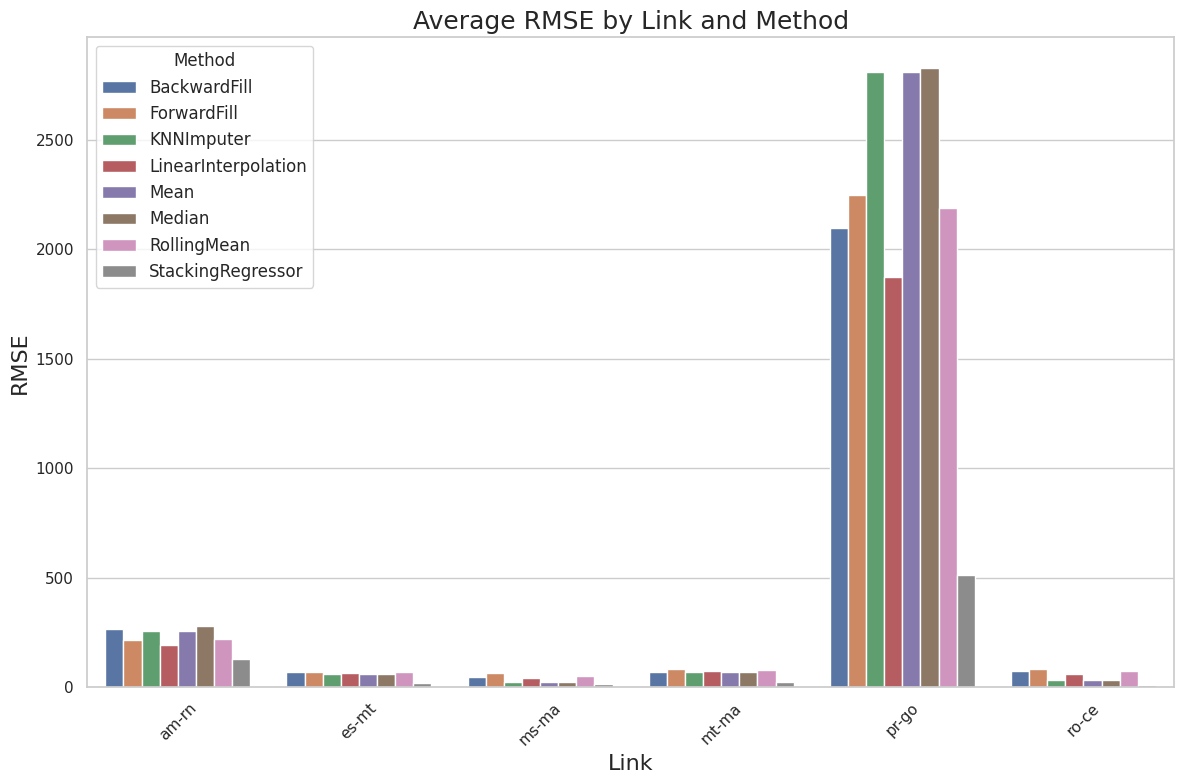

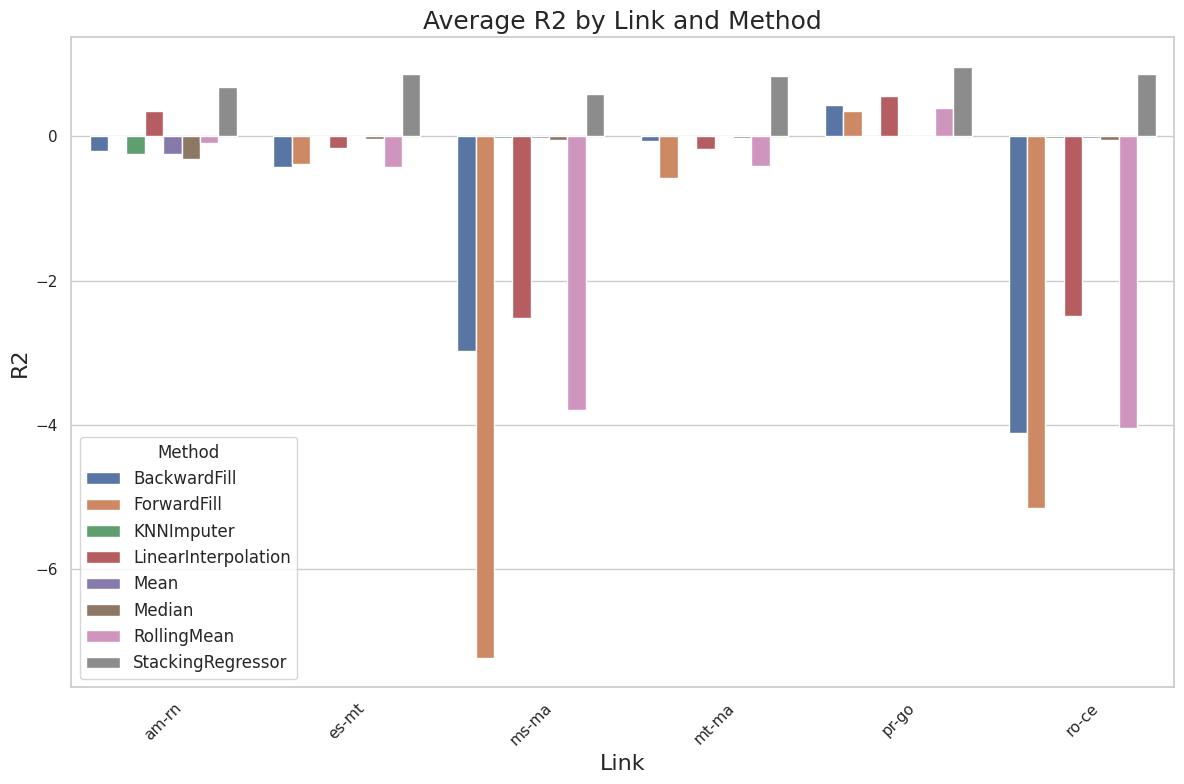

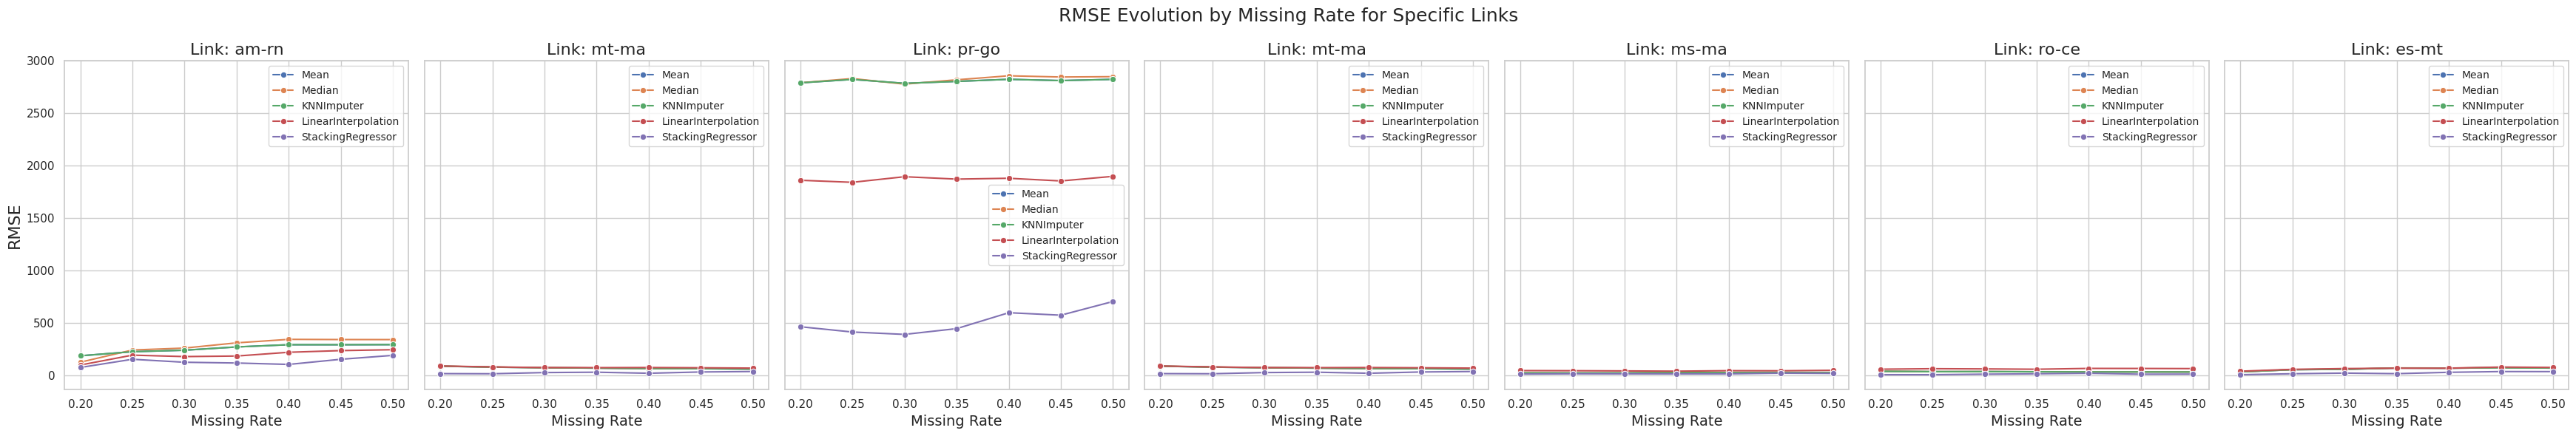

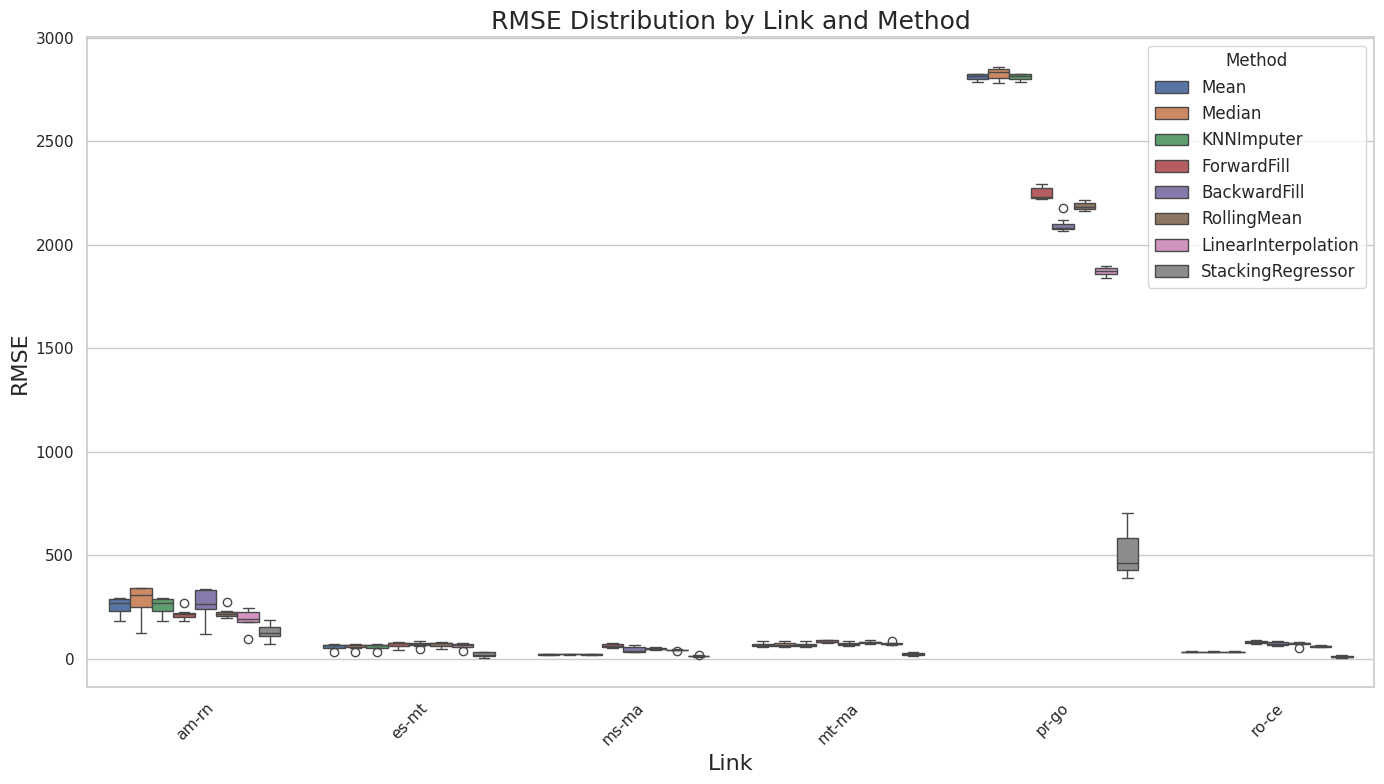

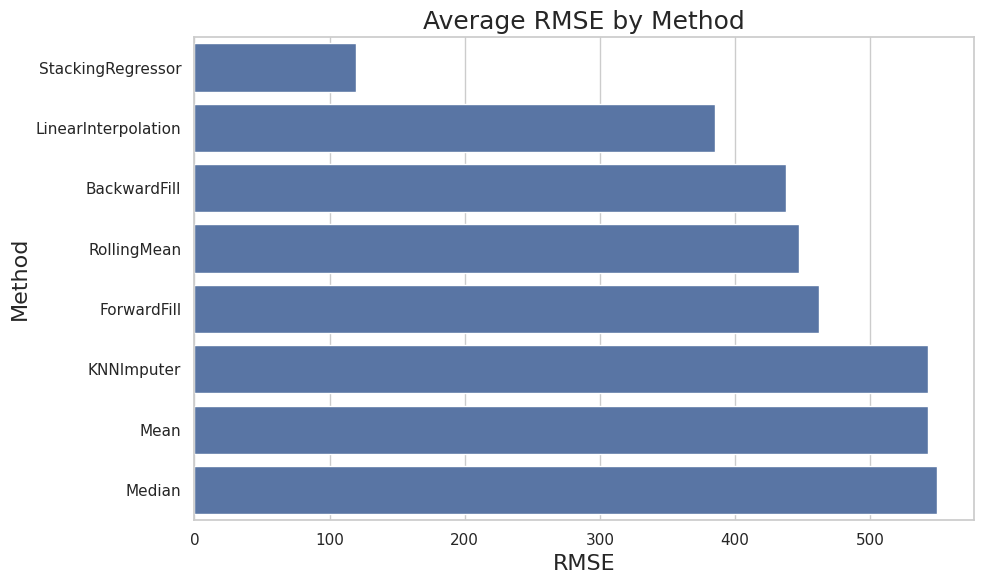

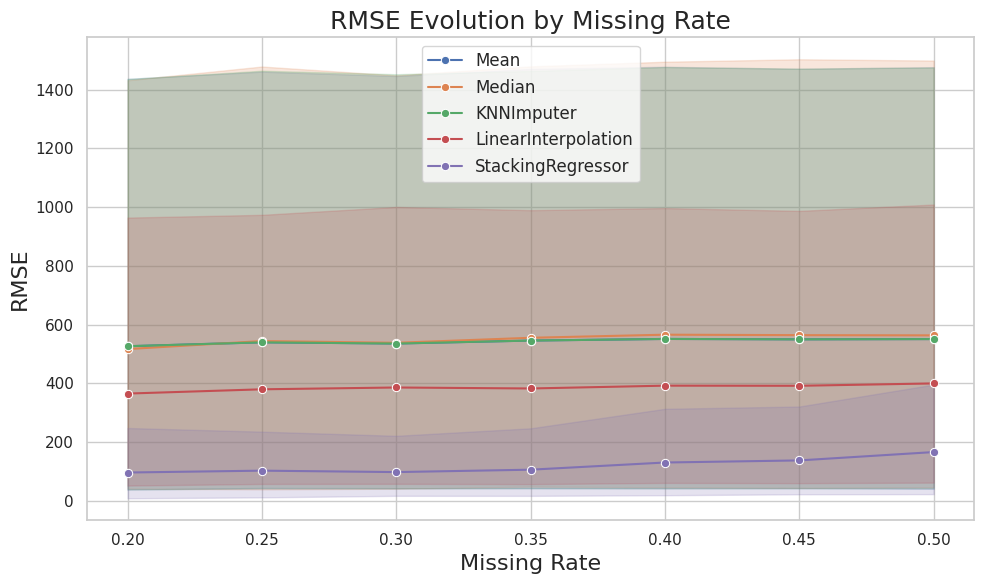

In [13]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

# ==============================
# CONFIGURAÇÕES GERAIS
# ==============================

FONT_CONFIG = {
    'method_names': 14,
    'axis_labels': 16,
    'axis_values': 14,
    'bar_values': 12,
    'legend': 12,
    'title': 18
}

sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

# ==============================
# FUNÇÃO DE ANÁLISE COM FILTRO DE LINKS
# ==============================

def final_robust_analysis_with_links(json_file_path, target_links=None):
    """Lê o JSON e cria DataFrame, podendo filtrar por links específicos."""
    with open(json_file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)

    records = []
    all_sources = set()

    for link, missing_data in data.items():
        # Filtra links se uma lista for fornecida
        if target_links and link not in target_links:
            continue
            
        all_sources.add(link)
        for missing_rate, methods in missing_data.items():
            missing_rate_float = float(missing_rate)

            # Baselines
            for method_name, metrics in methods['baseline'].items():
                records.append({
                    'link': link,
                    'missing_rate': missing_rate_float,
                    'method_type': 'baseline',
                    'method': method_name,
                    'rmse': metrics['rmse'],
                    'nrmse': metrics['nrmse'],
                    'r2': metrics['r2'],
                    'mape': metrics['mape']
                })

            # Stacking
            stacking_metrics = methods['stacking']['mean']['StackingRegressor']
            records.append({
                'link': link,
                'missing_rate': missing_rate_float,
                'method_type': 'stacking',
                'method': 'StackingRegressor',
                'rmse': stacking_metrics['rmse'],
                'nrmse': stacking_metrics['nrmse'],
                'r2': stacking_metrics['r2'],
                'mape': stacking_metrics['mape']
            })

    df = pd.DataFrame(records)

    print("\nFINAL ANALYSIS (WITH LINK FILTERING)")
    print("=" * 80)
    print(f"Target links: {target_links}")
    print(f"Links found: {len(all_sources)}")
    print(f"Total records: {len(df)}")
    print(f"Methods: {df['method'].nunique()}")
    print(f"Missing rates: {sorted(df['missing_rate'].unique())}")

    return df

# ==============================
# TABELAS POR LINK ESPECÍFICO
# ==============================

def print_link_specific_tables(df_clean, metodos_selecionados, target_links):
    """Gera tabelas detalhadas para cada link específico."""
    
    print("\n" + "=" * 80)
    print("LINK-SPECIFIC PERFORMANCE TABLES")
    print("=" * 80)
    
    metrics = ['rmse', 'nrmse', 'r2', 'mape']
    metric_names = {'rmse': 'RMSE', 'nrmse': 'NRMSE', 'r2': 'R²', 'mape': 'MAPE'}
    missing_rates = sorted(df_clean['missing_rate'].unique())
    
    for link in target_links:
        if link not in df_clean['link'].unique():
            print(f"\nLink '{link}' não encontrado nos dados!")
            continue
            
        df_link = df_clean[df_clean['link'] == link]
        print(f"\n{'='*60}")
        print(f"PERFORMANCE TABLE FOR LINK: {link}")
        print(f"{'='*60}")
        
        for metric in metrics:
            print(f"\n{metric_names[metric]} for {link}:")
            print("-" * 50)
            
            # Cria pivot table para este link e métrica
            pivot_data = df_link.pivot_table(
                values=metric, 
                index='missing_rate', 
                columns='method', 
                aggfunc='mean'
            )
            
            # Garante que todos os métodos estejam presentes
            for method in metodos_selecionados:
                if method not in pivot_data.columns:
                    pivot_data[method] = np.nan
            pivot_data = pivot_data[metodos_selecionados]
            
            # Header
            header = "Missing Rate | " + " | ".join([f"{method:>15}" for method in metodos_selecionados])
            print(header)
            print("-" * len(header))
            
            # Valores para cada missing rate
            for rate in missing_rates:
                if rate in pivot_data.index:
                    row_values = []
                    for method in metodos_selecionados:
                        value = pivot_data.loc[rate, method]
                        if pd.notna(value):
                            if metric == 'r2':
                                row_values.append(f"{value:>15.3f}")
                            elif metric == 'mape':
                                row_values.append(f"{value:>15.1f}")
                            else:
                                row_values.append(f"{value:>15.2f}")
                        else:
                            row_values.append(f"{'N/A':>15}")
                    print(f"{rate:>11.2f} | " + " | ".join(row_values))

# ==============================
# GRÁFICOS POR LINK
# ==============================

def plot_link_comparison(df_clean, target_links, metric='rmse'):
    """Compara o desempenho entre links específicos."""
    df_filtered = df_clean[df_clean['link'].isin(target_links)]
    
    plt.figure(figsize=(12, 8))
    
    # Média por link e método
    mean_data = df_filtered.groupby(['link', 'method'])[metric].mean().reset_index()
    
    sns.barplot(data=mean_data, x='link', y=metric, hue='method')
    plt.title(f"Average {metric.upper()} by Link and Method", fontsize=FONT_CONFIG['title'])
    plt.xlabel('Link', fontsize=FONT_CONFIG['axis_labels'])
    plt.ylabel(metric.upper(), fontsize=FONT_CONFIG['axis_labels'])
    plt.legend(title='Method', fontsize=FONT_CONFIG['legend'], title_fontsize=FONT_CONFIG['legend'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_link_evolution(df_clean, target_links, metric='rmse', methods_to_plot=None):
    """Evolução da métrica por missing rate para links específicos."""
    df_filtered = df_clean[df_clean['link'].isin(target_links)]
    
    if methods_to_plot:
        df_filtered = df_filtered[df_filtered['method'].isin(methods_to_plot)]
    
    # Criar subplots para cada link
    n_links = len(target_links)
    fig, axes = plt.subplots(1, n_links, figsize=(5*n_links, 6), sharey=True)
    
    if n_links == 1:
        axes = [axes]
    
    for i, link in enumerate(target_links):
        df_link = df_filtered[df_filtered['link'] == link]
        sns.lineplot(
            data=df_link,
            x='missing_rate',
            y=metric,
            hue='method',
            marker='o',
            ax=axes[i]
        )
        axes[i].set_title(f"Link: {link}", fontsize=FONT_CONFIG['axis_labels'])
        axes[i].set_xlabel('Missing Rate', fontsize=FONT_CONFIG['axis_values'])
        if i == 0:
            axes[i].set_ylabel(metric.upper(), fontsize=FONT_CONFIG['axis_labels'])
        else:
            axes[i].set_ylabel('')
        axes[i].legend(fontsize=FONT_CONFIG['legend']-2)
    
    plt.suptitle(f"{metric.upper()} Evolution by Missing Rate for Specific Links", 
                 fontsize=FONT_CONFIG['title'])
    plt.tight_layout()
    plt.show()

def plot_method_comparison_by_link(df_clean, target_links, metric='rmse'):
    """Comparação entre métodos para links específicos (boxplot)."""
    df_filtered = df_clean[df_clean['link'].isin(target_links)]
    
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df_filtered, x='link', y=metric, hue='method')
    plt.title(f"{metric.upper()} Distribution by Link and Method", fontsize=FONT_CONFIG['title'])
    plt.xlabel('Link', fontsize=FONT_CONFIG['axis_labels'])
    plt.ylabel(metric.upper(), fontsize=FONT_CONFIG['axis_labels'])
    plt.legend(title='Method', fontsize=FONT_CONFIG['legend'], title_fontsize=FONT_CONFIG['legend'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# ==============================
# RESUMO ESTATÍSTICO DOS LINKS
# ==============================

def print_link_summary(df_clean, target_links):
    """Imprime um resumo estatístico para os links selecionados."""
    print("\n" + "=" * 80)
    print("LINK PERFORMANCE SUMMARY")
    print("=" * 80)
    
    for link in target_links:
        if link not in df_clean['link'].unique():
            continue
            
        df_link = df_clean[df_clean['link'] == link]
        
        print(f"\n📊 SUMMARY FOR LINK: {link}")
        print("-" * 50)
        
        # Melhor método por métrica
        metrics = ['rmse', 'nrmse', 'r2', 'mape']
        metric_names = {'rmse': 'RMSE', 'nrmse': 'NRMSE', 'r2': 'R²', 'mape': 'MAPE'}
        
        for metric in metrics:
            best_method = df_link.groupby('method')[metric].mean()
            if metric in ['r2']:  # Para R², queremos o maior valor
                best_method = best_method.idxmax()
                best_value = df_link.groupby('method')[metric].mean().max()
            else:  # Para outros, queremos o menor valor
                best_method = best_method.idxmin()
                best_value = df_link.groupby('method')[metric].mean().min()
            
            print(f"Best {metric_names[metric]}: {best_method} ({best_value:.3f})")

# ==============================
# EXECUÇÃO PRINCIPAL
# ==============================

# Caminho para o seu arquivo JSON
json_path = Path("../../results/metrics_summary_final.json")

# LISTA DE LINKS QUE VOCÊ QUER ANALISAR
# Substitua pela sua lista de links
target_links = [
    "am-rn", 
    "mt-ma", 'pr-go', 'mt-ma', 'ms-ma', 'ro-ce', 'es-mt'
]

# Métodos selecionados
metodos_selecionados = [
    'Mean', 'Median', 'KNNImputer', 'LinearInterpolation', 'StackingRegressor'
]

# Gera o DataFrame filtrado pelos links
df_clean = final_robust_analysis_with_links(json_path, target_links)

# 1. Tabelas específicas por link
print_link_specific_tables(df_clean, metodos_selecionados, target_links)

# 2. Resumo estatístico
print_link_summary(df_clean, target_links)

# 3. Gráficos comparativos
plot_link_comparison(df_clean, target_links, metric='rmse')
plot_link_comparison(df_clean, target_links, metric='r2')

# 4. Evolução por missing rate
plot_link_evolution(df_clean, target_links, metric='rmse', methods_to_plot=metodos_selecionados)

# 5. Boxplot comparativo
plot_method_comparison_by_link(df_clean, target_links, metric='rmse')

# 6. Gráficos gerais (opcionais)
plot_comparison_final_separado(df_clean, metric='rmse')
plot_evolution_missing_separado(df_clean, metric='rmse', metodos_selecionados=metodos_selecionados)

### Fazneod a media das tabelas e links


FINAL ANALYSIS (WITH LINK FILTERING)
Target links: ['am-rn', 'mt-ma', 'pr-go', 'mt-ma', 'ms-ma', 'ro-ce', 'es-mt']
Links found: 6
Total records: 336
Methods: 8
Missing rates: [np.float64(0.2), np.float64(0.25), np.float64(0.3), np.float64(0.35), np.float64(0.4), np.float64(0.45), np.float64(0.5)]

AVERAGE PERFORMANCE BY SOURCE AND IMPUTATION METHOD

RMSE (Average across sources):
------------------------------------------------------------
Missing Rate | StackingRegressor |            Mean |          Median |      KNNImputer |     ForwardFill |    BackwardFill
--------------------------------------------------------------------------------------------------------------------------
       0.20 |           96.22 |          526.15 |          516.45 |          526.15 |          461.15 |          414.23
       0.25 |          102.53 |          539.44 |          543.82 |          539.44 |          469.18 |          427.82
       0.30 |           97.67 |          535.33 |          537.86 |  

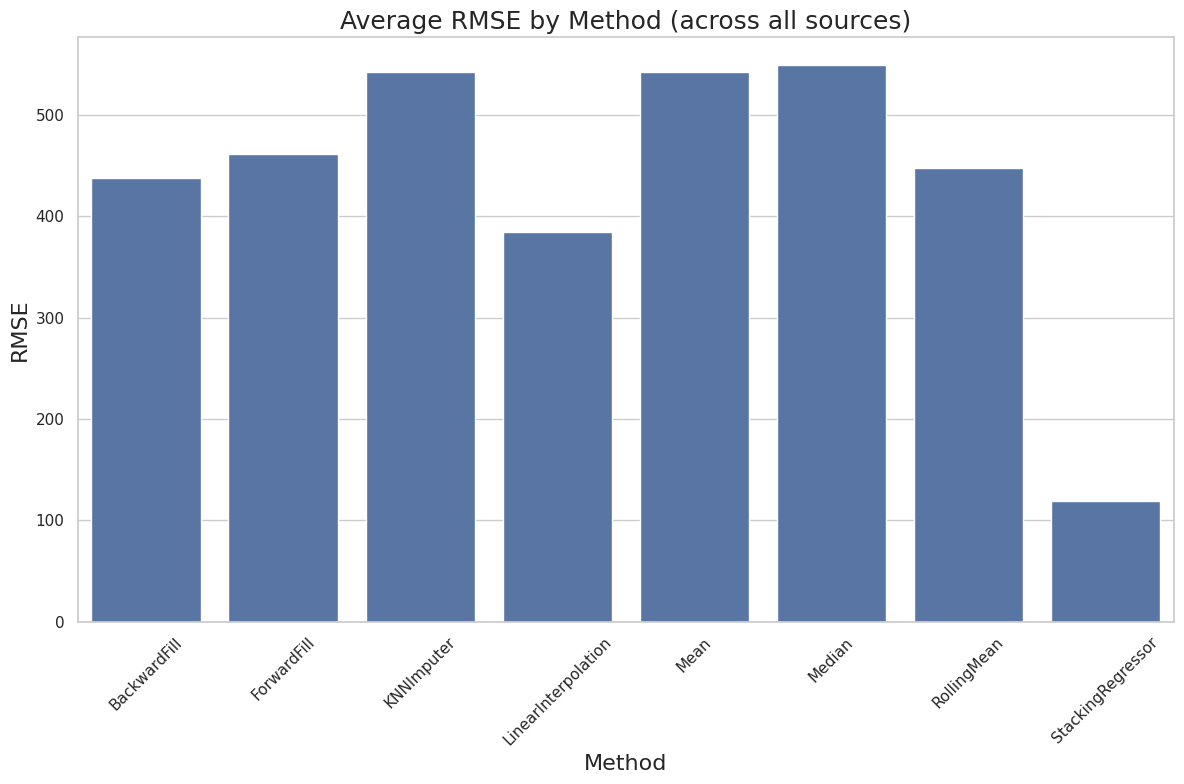

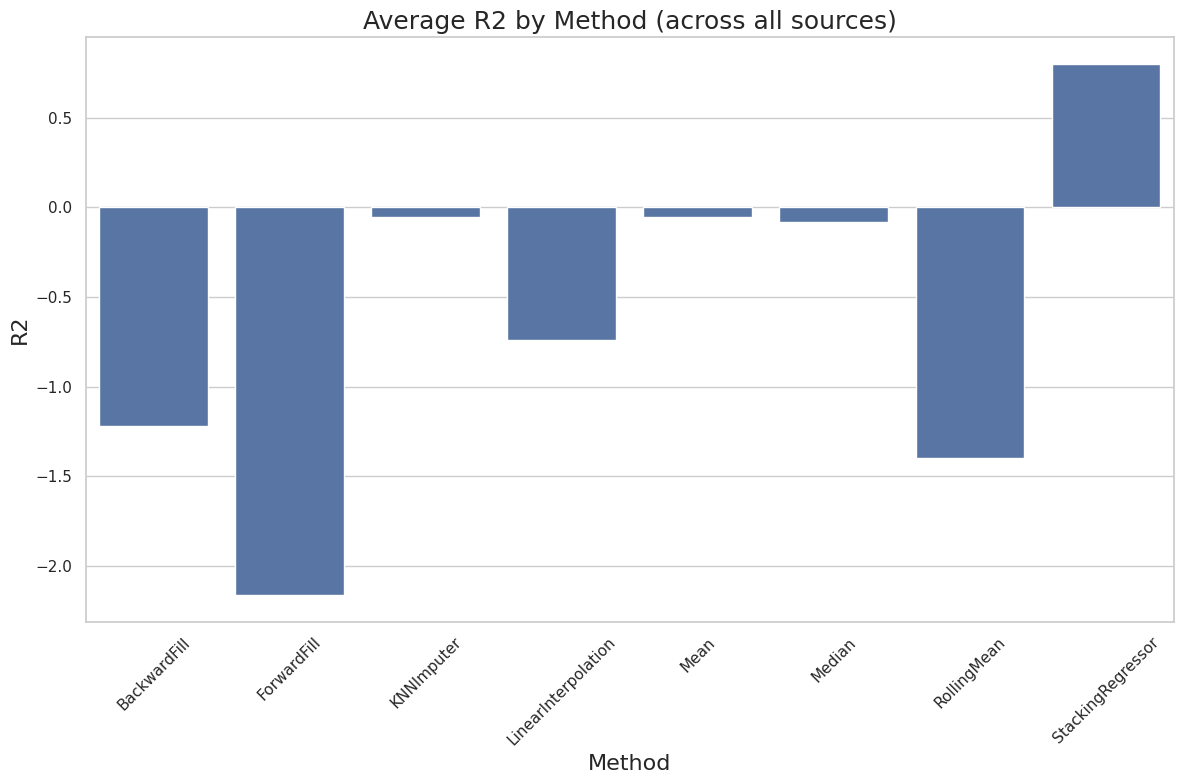

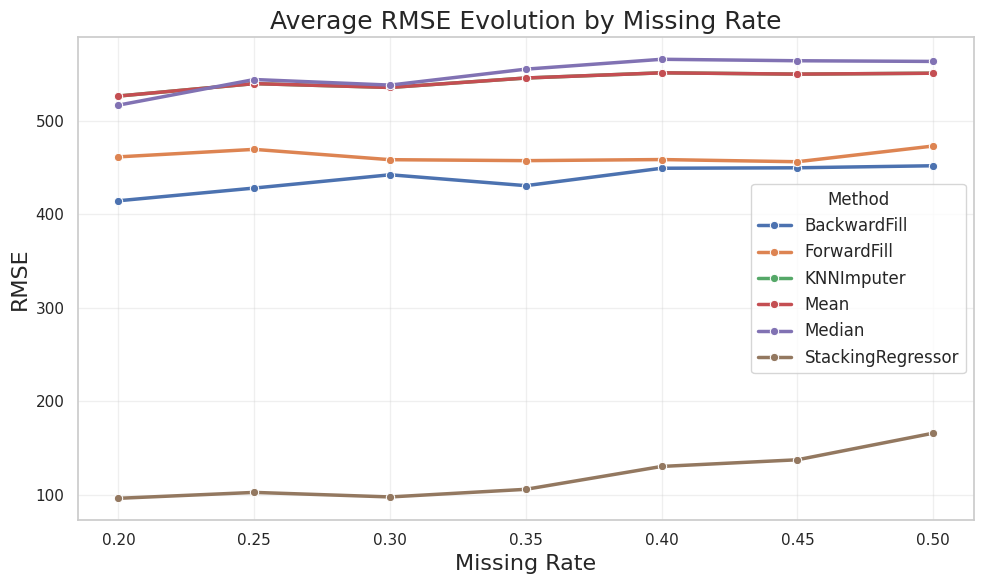

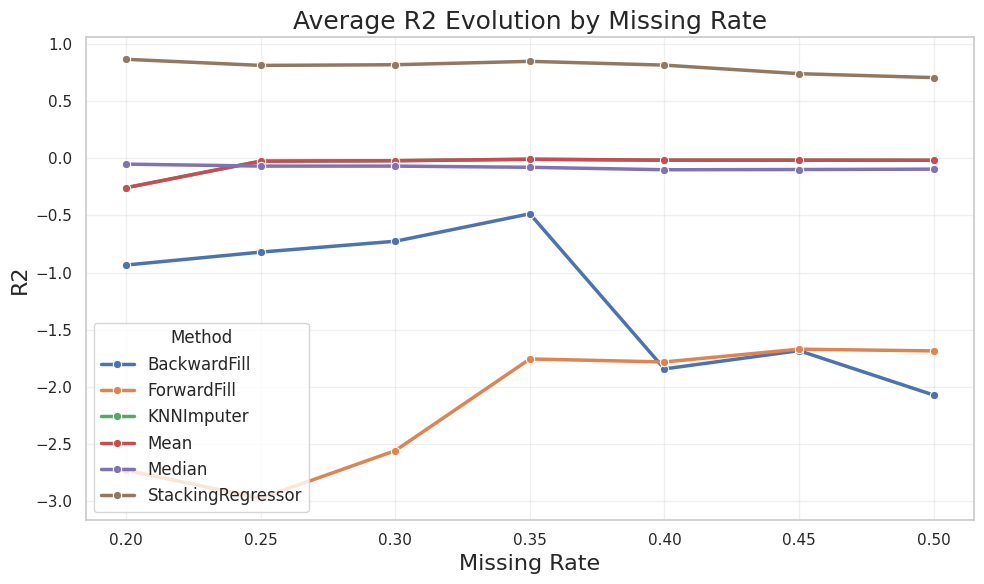

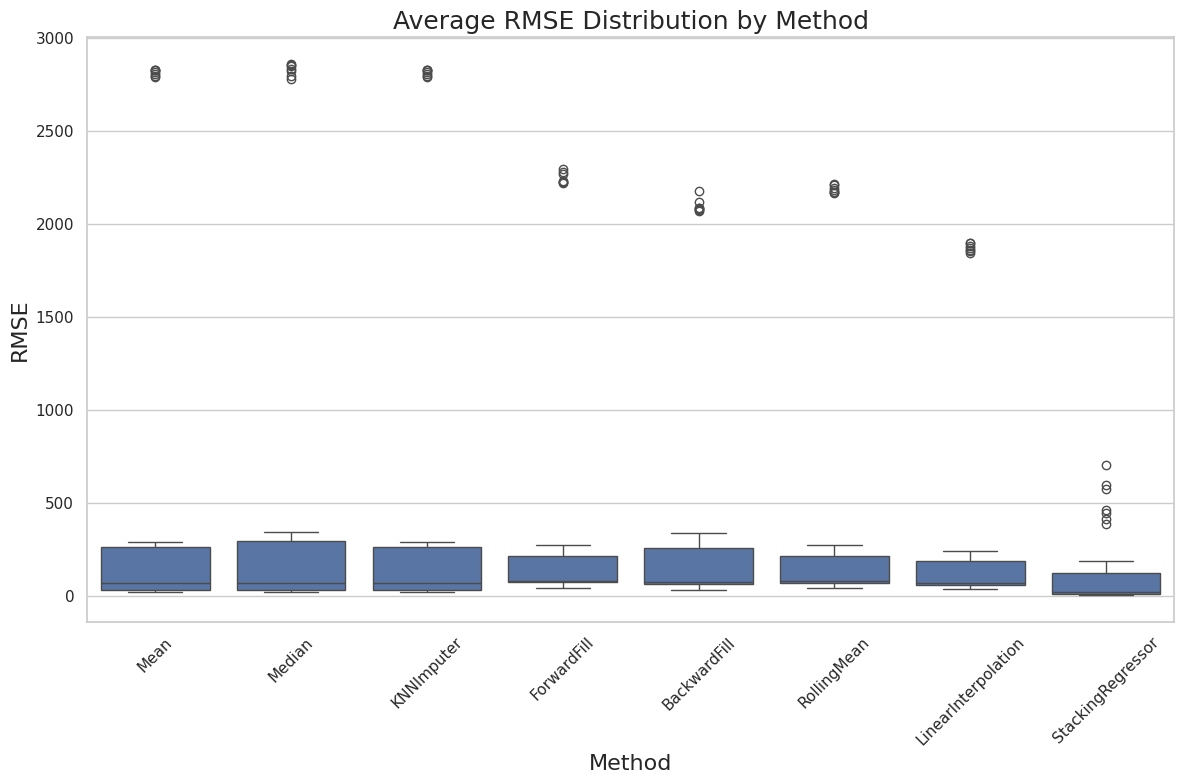

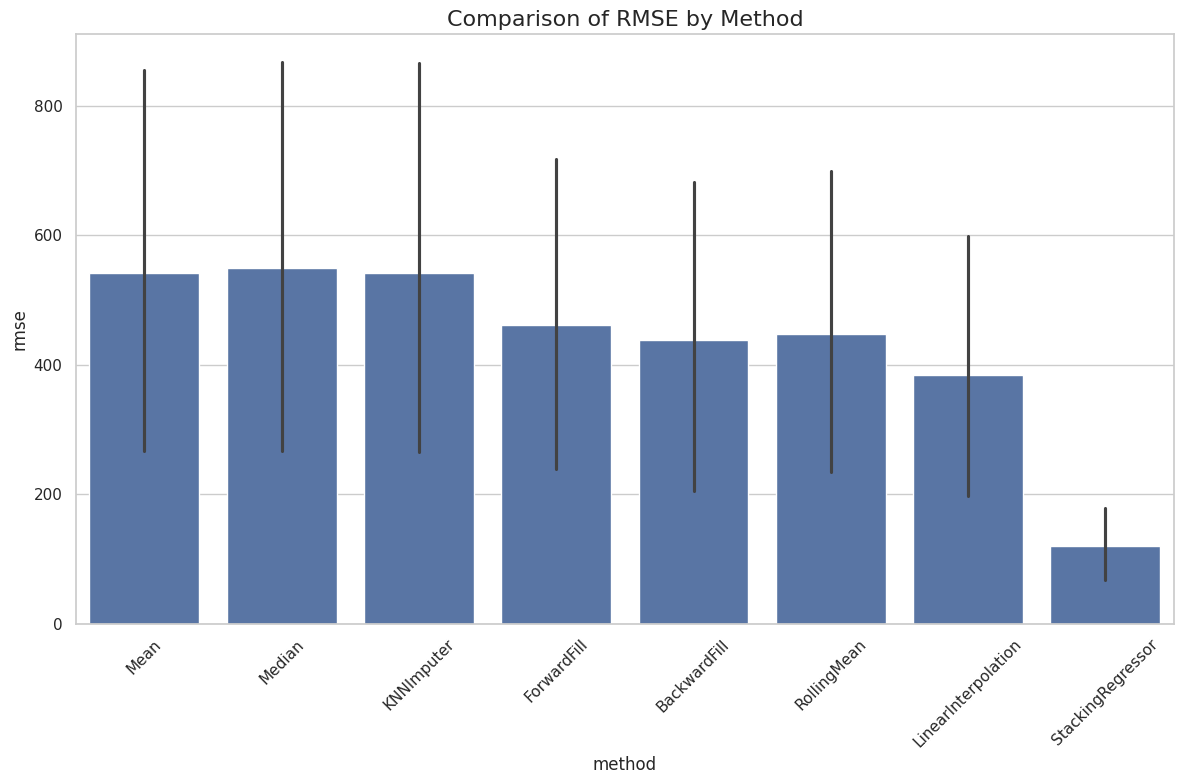

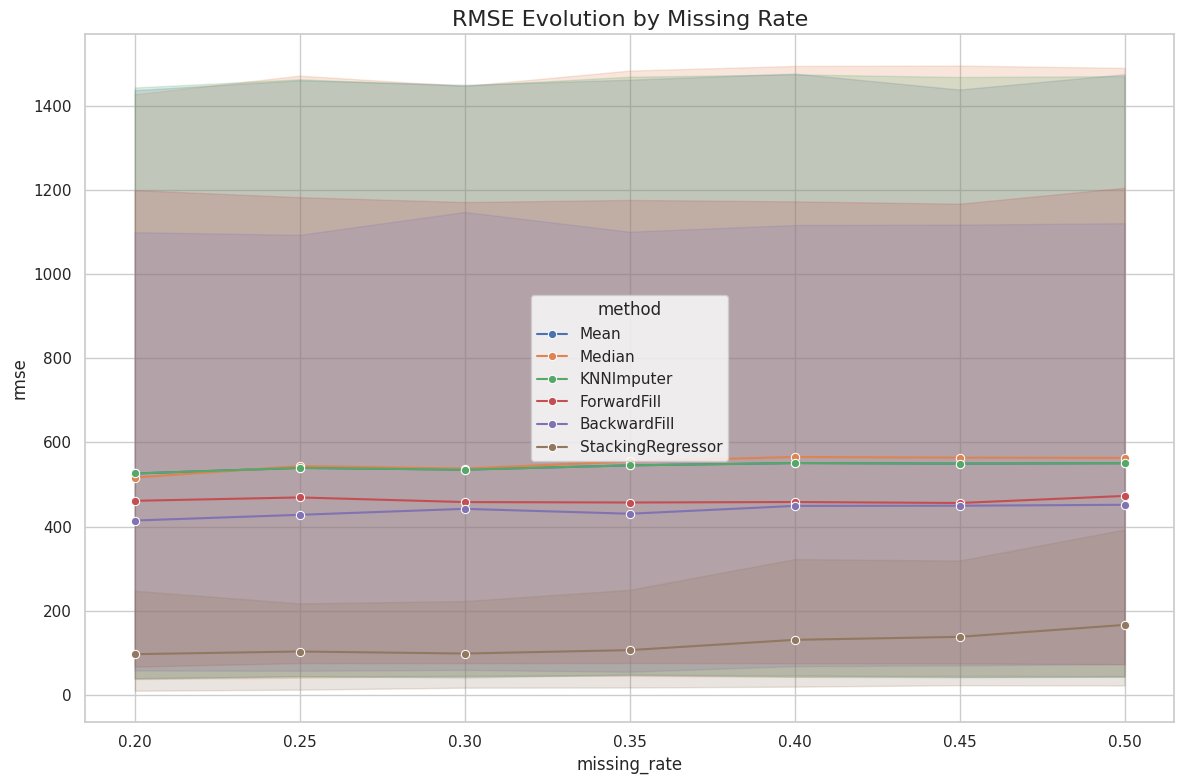

In [15]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

# ==============================
# CONFIGURAÇÕES GERAIS
# ==============================

FONT_CONFIG = {
    'method_names': 14,
    'axis_labels': 16,
    'axis_values': 14,
    'bar_values': 12,
    'legend': 12,
    'title': 18
}

sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

# ==============================
# FUNÇÃO DE ANÁLISE COM FILTRO DE LINKS
# ==============================

def final_robust_analysis_with_links(json_file_path, target_links=None):
    """Lê o JSON e cria DataFrame, podendo filtrar por links específicos."""
    with open(json_file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)

    records = []
    all_sources = set()

    for link, missing_data in data.items():
        # Filtra links se uma lista for fornecida
        if target_links and link not in target_links:
            continue
            
        all_sources.add(link)
        for missing_rate, methods in missing_data.items():
            missing_rate_float = float(missing_rate)

            # Baselines
            for method_name, metrics in methods['baseline'].items():
                records.append({
                    'link': link,
                    'missing_rate': missing_rate_float,
                    'method_type': 'baseline',
                    'method': method_name,
                    'rmse': metrics['rmse'],
                    'nrmse': metrics['nrmse'],
                    'r2': metrics['r2'],
                    'mape': metrics['mape']
                })

            # Stacking
            stacking_metrics = methods['stacking']['mean']['StackingRegressor']
            records.append({
                'link': link,
                'missing_rate': missing_rate_float,
                'method_type': 'stacking',
                'method': 'StackingRegressor',
                'rmse': stacking_metrics['rmse'],
                'nrmse': stacking_metrics['nrmse'],
                'r2': stacking_metrics['r2'],
                'mape': stacking_metrics['mape']
            })

    df = pd.DataFrame(records)

    print("\nFINAL ANALYSIS (WITH LINK FILTERING)")
    print("=" * 80)
    print(f"Target links: {target_links}")
    print(f"Links found: {len(all_sources)}")
    print(f"Total records: {len(df)}")
    print(f"Methods: {df['method'].nunique()}")
    print(f"Missing rates: {sorted(df['missing_rate'].unique())}")

    return df

# ==============================
# TABELA COM MÉDIA POR SOURCE E IMPUTAÇÃO
# ==============================

def print_average_table_by_source_imputation(df_clean, metodos_selecionados):
    """Gera tabela com média por source e método de imputação."""
    
    print("\n" + "=" * 80)
    print("AVERAGE PERFORMANCE BY SOURCE AND IMPUTATION METHOD")
    print("=" * 80)
    
    metrics = ['rmse', 'nrmse', 'r2', 'mape']
    metric_names = {'rmse': 'RMSE', 'nrmse': 'NRMSE', 'r2': 'R²', 'mape': 'MAPE'}
    missing_rates = sorted(df_clean['missing_rate'].unique())
    
    # Calcula a média por source e método para cada missing rate
    for metric in metrics:
        print(f"\n{metric_names[metric]} (Average across sources):")
        print("-" * 60)
        
        # Cria pivot table com média por missing_rate e method
        pivot_data = df_clean.pivot_table(
            values=metric, 
            index='missing_rate', 
            columns='method', 
            aggfunc='mean'
        )
        
        # Garante que todos os métodos estejam presentes
        for method in metodos_selecionados:
            if method not in pivot_data.columns:
                pivot_data[method] = np.nan
        pivot_data = pivot_data[metodos_selecionados]
        
        # Header
        header = "Missing Rate | " + " | ".join([f"{method:>15}" for method in metodos_selecionados])
        print(header)
        print("-" * len(header))
        
        # Valores para cada missing rate
        for rate in missing_rates:
            if rate in pivot_data.index:
                row_values = []
                for method in metodos_selecionados:
                    value = pivot_data.loc[rate, method]
                    if pd.notna(value):
                        if metric == 'r2':
                            row_values.append(f"{value:>15.3f}")
                        elif metric == 'mape':
                            row_values.append(f"{value:>15.1f}")
                        else:
                            row_values.append(f"{value:>15.2f}")
                    else:
                        row_values.append(f"{'N/A':>15}")
                print(f"{rate:>11.2f} | " + " | ".join(row_values))

# ==============================
# GRÁFICOS COM MÉDIA
# ==============================

def plot_average_comparison(df_clean, metric='rmse'):
    """Compara o desempenho médio entre métodos."""
    
    # Média por método (across all sources and missing rates)
    mean_data = df_clean.groupby('method')[metric].mean().reset_index()
    
    plt.figure(figsize=(12, 8))
    sns.barplot(data=mean_data, x='method', y=metric)
    plt.title(f"Average {metric.upper()} by Method (across all sources)", fontsize=FONT_CONFIG['title'])
    plt.xlabel('Method', fontsize=FONT_CONFIG['axis_labels'])
    plt.ylabel(metric.upper(), fontsize=FONT_CONFIG['axis_labels'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_average_evolution(df_clean, metric='rmse', methods_to_plot=None):
    """Evolução da métrica média por missing rate."""
    
    df_filtered = df_clean.copy()
    if methods_to_plot:
        df_filtered = df_filtered[df_filtered['method'].isin(methods_to_plot)]
    
    # Média por missing rate e método
    mean_evolution = df_filtered.groupby(['missing_rate', 'method'])[metric].mean().reset_index()
    
    plt.figure(figsize=(10, 6))
    sns.lineplot(
        data=mean_evolution,
        x='missing_rate',
        y=metric,
        hue='method',
        marker='o',
        linewidth=2.5
    )
    plt.title(f"Average {metric.upper()} Evolution by Missing Rate", fontsize=FONT_CONFIG['title'])
    plt.xlabel('Missing Rate', fontsize=FONT_CONFIG['axis_labels'])
    plt.ylabel(metric.upper(), fontsize=FONT_CONFIG['axis_labels'])
    plt.legend(title='Method', fontsize=FONT_CONFIG['legend'], title_fontsize=FONT_CONFIG['legend'])
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_method_comparison_average(df_clean, metric='rmse'):
    """Comparação entre métodos usando boxplot com dados médios."""
    
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=df_clean, x='method', y=metric)
    plt.title(f"Average {metric.upper()} Distribution by Method", fontsize=FONT_CONFIG['title'])
    plt.xlabel('Method', fontsize=FONT_CONFIG['axis_labels'])
    plt.ylabel(metric.upper(), fontsize=FONT_CONFIG['axis_labels'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# ==============================
# RESUMO ESTATÍSTICO GERAL
# ==============================

def print_overall_summary(df_clean):
    """Imprime um resumo estatístico geral."""
    print("\n" + "=" * 80)
    print("OVERALL PERFORMANCE SUMMARY")
    print("=" * 80)
    
    # Melhor método por métrica (média geral)
    metrics = ['rmse', 'nrmse', 'r2', 'mape']
    metric_names = {'rmse': 'RMSE', 'nrmse': 'NRMSE', 'r2': 'R²', 'mape': 'MAPE'}
    
    for metric in metrics:
        best_method = df_clean.groupby('method')[metric].mean()
        if metric in ['r2']:  # Para R², queremos o maior valor
            best_method_name = best_method.idxmax()
            best_value = best_method.max()
        else:  # Para outros, queremos o menor valor
            best_method_name = best_method.idxmin()
            best_value = best_method.min()
        
        print(f"Best average {metric_names[metric]}: {best_method_name} ({best_value:.3f})")

# ==============================
# GRÁFICOS GERAIS (mantidos para compatibilidade)
# ==============================

def plot_comparison_final_separado(df, metric='rmse'):
    """Gráfico de comparação final separado."""
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df, x='method', y=metric)
    plt.title(f'Comparison of {metric.upper()} by Method', fontsize=16)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_evolution_missing_separado(df, metric='rmse', metodos_selecionados=None):
    """Gráfico de evolução por missing rate."""
    if metodos_selecionados:
        df = df[df['method'].isin(metodos_selecionados)]
    
    plt.figure(figsize=(12, 8))
    sns.lineplot(data=df, x='missing_rate', y=metric, hue='method', marker='o')
    plt.title(f'{metric.upper()} Evolution by Missing Rate', fontsize=16)
    plt.tight_layout()
    plt.show()

# ==============================
# EXECUÇÃO PRINCIPAL
# ==============================

# Caminho para o seu arquivo JSON
json_path = Path("../../results/metrics_summary_final.json")

# LISTA DE LINKS QUE VOCÊ QUER ANALISAR
target_links = [
    "am-rn", 
    "mt-ma", 'pr-go', 'mt-ma', 'ms-ma', 'ro-ce', 'es-mt'
]

# Métodos selecionados
metodos_selecionados = ['StackingRegressor', 'Mean', 'Median', 'KNNImputer', 'ForwardFill', 'BackwardFill']

# Gera o DataFrame filtrado pelos links
df_clean = final_robust_analysis_with_links(json_path, target_links)

# 1. Tabela com média por source e imputação
print_average_table_by_source_imputation(df_clean, metodos_selecionados)

# 2. Resumo estatístico geral
print_overall_summary(df_clean)

# 3. Gráficos com médias
plot_average_comparison(df_clean, metric='rmse')
plot_average_comparison(df_clean, metric='r2')

# 4. Evolução por missing rate (média)
plot_average_evolution(df_clean, metric='rmse', methods_to_plot=metodos_selecionados)
plot_average_evolution(df_clean, metric='r2', methods_to_plot=metodos_selecionados)

# 5. Boxplot comparativo (média)
plot_method_comparison_average(df_clean, metric='rmse')

# 6. Gráficos gerais (opcionais - mantidos para compatibilidade)
plot_comparison_final_separado(df_clean, metric='rmse')
plot_evolution_missing_separado(df_clean, metric='rmse', metodos_selecionados=metodos_selecionados)